# packages

In [5]:
options(stringsAsFactors = F)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggplot2)
library(cowplot)
library(dplyr)
library(reshape)
library(circlize)

Loading required package: grid

ComplexHeatmap version 2.9.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are 

In [6]:
# orders
cluster.order <- c('Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5')
# sample.order <- c("IMR_ENCC", "UE_ENCC", "HSCR_5c3","HSCR_10c2","HSCR_20c7","HSCR_1c11","HSCR_17c8","HSCR_23c9")
sample.order <- c("IMR90","UE02302","HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23","HSCR#6")

# colors
sample.colors <- c(brewer.pal(9,"Set1")[c(1:5, 7:9)], "green")
severity.colors <- c("#4DAF4A", "#E41A1C", "#984EA3")
cluster.colors <- c("#F8766D", "#A3A500", "#00BF7D", "#00B0F6", "#E76BF3")

# all clusters

In [53]:
table(all_tsne$group)


  IMR90 UE02302  HSCR#5 HSCR#10 HSCR#20  HSCR#1 HSCR#17 HSCR#23  HSCR#6 
    388     383     357     328     342     337     244     271     335 

## tsne

In [56]:
centers <- all_tsne %>% dplyr::group_by(cluster) %>% summarize(X = median(X), 
            Y = median(Y))

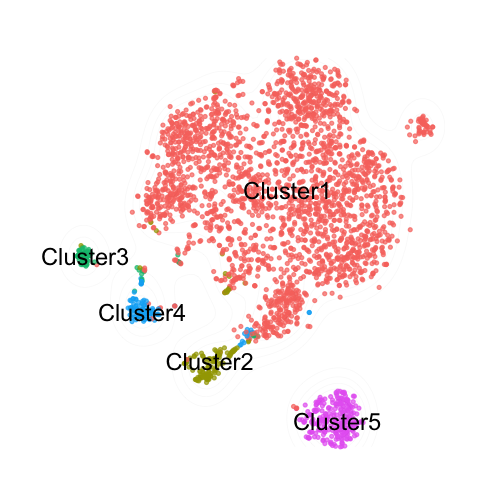

In [72]:
options(repr.plot.width=4, repr.plot.height=4)
p <- ggplot(all_tsne, aes(x=X, y=Y, color=cluster)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    geom_point(size=0.8, alpha=0.7) +
    geom_density_2d(color='black', size=0.05, alpha=0.15) +
    geom_text(data = centers, mapping = aes(label = cluster), size = 5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_blank()) +
    theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    labs(x = "",y = "", title = "") +
    scale_color_manual(values=cluster.colors) +
    xlim(-40,30)
    
p

In [73]:
ggsave(filename = "HSCR.tSNE.cluster.pdf", width = 4, height = 4)

In [59]:
head(all_tsne)

X          Y          cluster  group   group.old
X20c7.E6.A10  -5.104439  -3.820615 Cluster1 HSCR#20 HSCR_20c7
X20c7.E6.A11 -21.921137 -10.210686 Cluster3 HSCR#20 HSCR_20c7
X20c7.E6.A1   -2.239035  -6.330191 Cluster1 HSCR#20 HSCR_20c7
X20c7.E6.A12   9.503683   7.361940 Cluster1 HSCR#20 HSCR_20c7
X20c7.E6.A13 -10.822118 -24.994643 Cluster2 HSCR#20 HSCR_20c7
X20c7.E6.A14   2.295647  10.755725 Cluster1 HSCR#20 HSCR_20c7

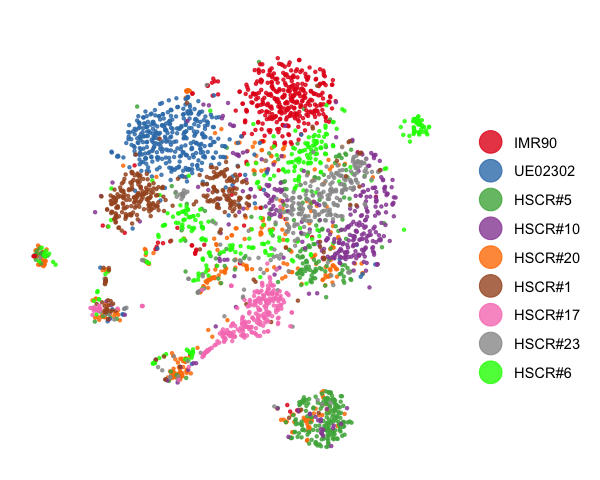

In [65]:
# show samples
options(repr.plot.width=5, repr.plot.height=4)
p <- ggplot(all_tsne, aes(x=X, y=Y, color=group)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    geom_point(size=0.6, alpha=0.8) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 4.5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    # theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    labs(x = "",y = "", title = "") +
    theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # change legend dot size
    guides(colour = guide_legend(override.aes = list(size=6))) +
    #
    scale_color_manual(values=sample.colors)
p

In [66]:
ggsave(filename = "HSCR.tSNE.sample.pdf", width = 5, height = 4)

In [77]:
merged_df <- add.background.point(all_tsne, sample.order = sample.order, group.order = cluster.order)

In [79]:
merged_df$variable <- factor(merged_df$variable, levels = c("IMR90","UE02302","HSCR#6","HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23"))

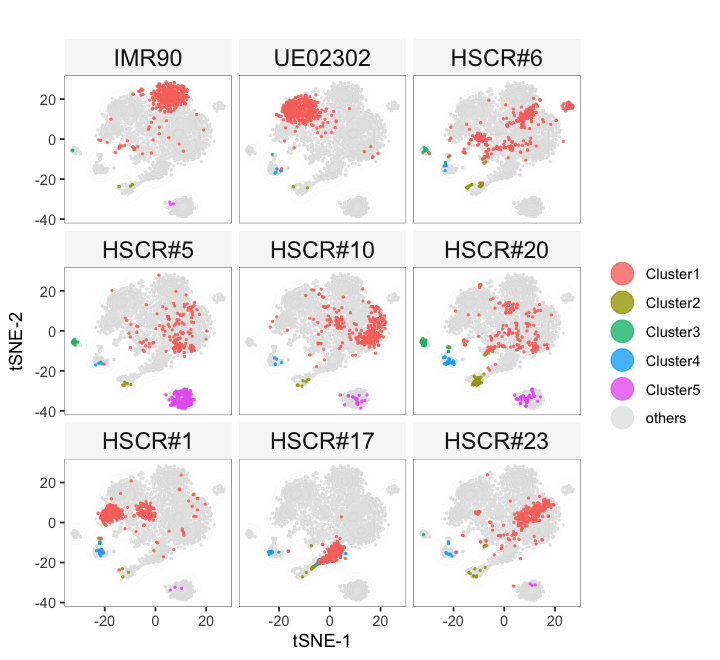

In [81]:
options(repr.plot.width=6, repr.plot.height=5.5)
p <- ggplot(merged_df, aes(x=X, y=Y, color=value)) +
    # facet_grid(cols = vars(shape_by)) +
    facet_wrap( ~ variable, ncol=3) + # error in border
    geom_point(size=0.3, alpha=0.8) +
    geom_density_2d(color='black', size=0.05, alpha=0.15) +
    #geom_text(data = centers, mapping = aes(label = cluster), size = 4.5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    #theme(legend.position = "none") +
    # strip
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11),
          strip.background = element_rect(fill = "gray97", color = NA)) +
    #
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    scale_color_manual(values=c(cluster.colors, "gray90")) +
    guides(colour = guide_legend(override.aes = list(size=6)))
p

In [82]:
ggsave(filename = "HSCR.tSNE.sample.facet.pdf", width = 6, height = 5.5)

## show expression
- 'SOX10','PLP1','EDNRB','ERBB3'

In [87]:
library(scater)

In [88]:
all_tsne$SOX10 <- (logcounts(sce_HSCR)["SOX10",])
all_tsne$PLP1 <- (logcounts(sce_HSCR)["PLP1",])
all_tsne$EDNRB <- (logcounts(sce_HSCR)["EDNRB",])
all_tsne$ERBB3 <- (logcounts(sce_HSCR)["ERBB3",])

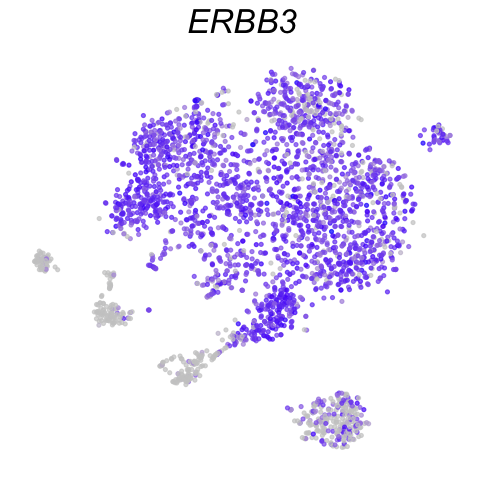

In [96]:
options(repr.plot.width=4, repr.plot.height=4)
p <- ggplot(all_tsne, aes(x=X, y=Y, color=ERBB3)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    geom_point(size=0.8, alpha=0.7) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    # theme(legend.title=element_blank()) +
    theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    labs(x = "",y = "", title = "ERBB3") +
    theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # title position
    theme(plot.title = element_text(hjust = 0.5, face = "italic", size=20)) +
    scale_colour_gradient(low = "gray80", high = "blue")
p

In [97]:
ggsave(filename = "HSCR.tSNE.ERBB3.pdf", width = 4, height = 4)

## proportion

In [98]:
sample.order

[1] "IMR90"   "UE02302" "HSCR#5"  "HSCR#10" "HSCR#20" "HSCR#1"  "HSCR#17"
[8] "HSCR#23" "HSCR#6"

In [100]:
head(all_tsne)

X          Y          cluster  group   group.old SOX10    PLP1    
X20c7.E6.A10  -5.104439  -3.820615 Cluster1 HSCR#20 HSCR_20c7 0.000000 8.272956
X20c7.E6.A11 -21.921137 -10.210686 Cluster3 HSCR#20 HSCR_20c7 4.912650 0.000000
X20c7.E6.A1   -2.239035  -6.330191 Cluster1 HSCR#20 HSCR_20c7 4.456149 8.702277
X20c7.E6.A12   9.503683   7.361940 Cluster1 HSCR#20 HSCR_20c7 0.000000 7.543187
X20c7.E6.A13 -10.822118 -24.994643 Cluster2 HSCR#20 HSCR_20c7 0.000000 4.500165
X20c7.E6.A14   2.295647  10.755725 Cluster1 HSCR#20 HSCR_20c7 4.697107 8.764772
             EDNRB    ERBB3    
X20c7.E6.A10 7.657926 7.0064102
X20c7.E6.A11 0.000000 0.7990873
X20c7.E6.A1  6.811214 7.3209359
X20c7.E6.A12 6.569096 7.2650055
X20c7.E6.A13 0.000000 0.0000000
X20c7.E6.A14 2.150560 4.5710700

In [110]:
# all_tsne$group

In [111]:
countTable <- all_tsne %>% dplyr::group_by(group) %>% dplyr::count(cluster)

In [112]:
countTable$group <- factor(countTable$group, levels = rev(sample.order))
countTable$cluster <- factor(countTable$cluster, levels = paste("Cluster",5:1,sep = ""))

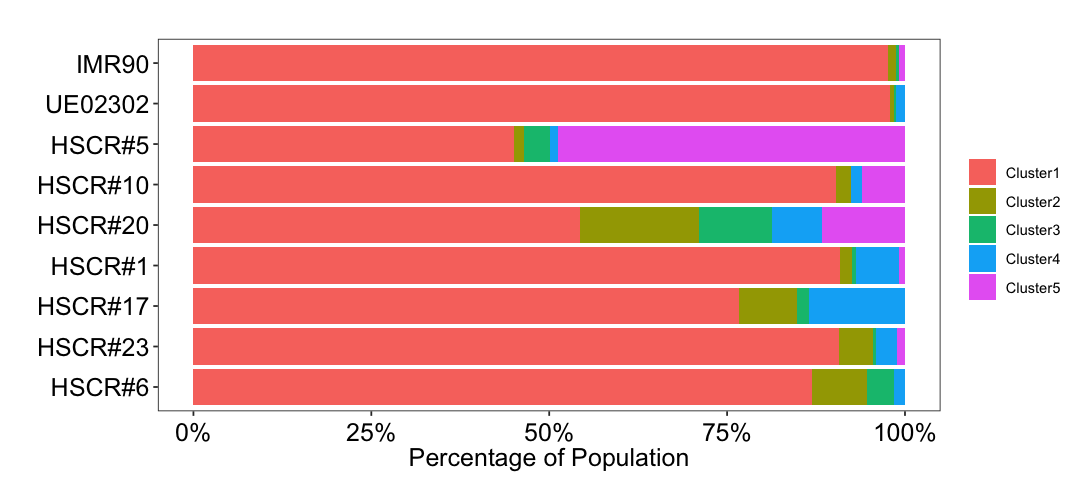

In [114]:
options(repr.plot.width=9, repr.plot.height=4)
library(scales)
ggplot(data=countTable, aes(x=group, y=n, fill=cluster)) +
  geom_bar(stat="identity", position="fill", alpha=1) +
  theme_bw() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  labs(x = "",y = "Percentage of Population", title = " ") + 
  theme(axis.text.x  = element_text(face="plain", angle=0, size = 15, color = "black", vjust=0.5),
        axis.text.y  = element_text(face="plain", size = 15, color = "black"),
        axis.title =element_text(size = 15)) +
  theme(legend.title = element_blank()) +
  scale_y_continuous(labels = percent_format()) +
  coord_flip() +
  scale_fill_manual(values=rev(cluster.colors), 
                    guide = guide_legend(reverse=T))

In [115]:
ggsave(filename = "HSCR.cluster.pct.pdf", width = 9, height = 4)

# heatmap

## example

In [3]:
set.seed(123)
nr1 = 4; nr2 = 8; nr3 = 6; nr = nr1 + nr2 + nr3
nc1 = 6; nc2 = 8; nc3 = 10; nc = nc1 + nc2 + nc3
mat = cbind(rbind(matrix(rnorm(nr1*nc1, mean = 1,   sd = 0.5), nr = nr1),
          matrix(rnorm(nr2*nc1, mean = 0,   sd = 0.5), nr = nr2),
          matrix(rnorm(nr3*nc1, mean = 0,   sd = 0.5), nr = nr3)),
    rbind(matrix(rnorm(nr1*nc2, mean = 0,   sd = 0.5), nr = nr1),
          matrix(rnorm(nr2*nc2, mean = 1,   sd = 0.5), nr = nr2),
          matrix(rnorm(nr3*nc2, mean = 0,   sd = 0.5), nr = nr3)),
    rbind(matrix(rnorm(nr1*nc3, mean = 0.5, sd = 0.5), nr = nr1),
          matrix(rnorm(nr2*nc3, mean = 0.5, sd = 0.5), nr = nr2),
          matrix(rnorm(nr3*nc3, mean = 1,   sd = 0.5), nr = nr3))
   )
mat = mat[sample(nr, nr), sample(nc, nc)] # random shuffle rows and columns
rownames(mat) = paste0("row", seq_len(nr))
colnames(mat) = paste0("column", seq_len(nc))

In [1]:
# Heatmap(mat)

In [46]:
library(circlize)
col_fun = colorRamp2(c(-2, 0, 3), c("green", "white", "red"))
col_fun(seq(-3, 3))

[1] "#00FF00FF" "#00FF00FF" "#B1FF9AFF" "#FFFFFFFF" "#FFBFAAFF" "#FF7B5AFF"
[7] "#FF0000FF"

In [14]:
# seurat
library(circlize)
col_fun = colorRamp2(c(-2, 0, 3), c("#FF00FF","#000000","#FFFF00"))
col_fun(seq(-3, 3))

[1] "#FF00FFFF" "#FF00FFFF" "#781E77FF" "#000000FF" "#504E17FF" "#A3A21BFF"
[7] "#FFFF00FF"

## load data - all cluster markers

In [69]:
dim(sc3_marker)

[1] 879   4

In [4]:
anno$col$Sample <- plyr::mapvalues(anno$col$Sample, from = c("UE"), to = c("UE02302"))
names(anno$colors$Sample) <- plyr::mapvalues(names(anno$colors$Sample), from = c("UE"), to = c("UE2302"))

### top

In [182]:
ha <- HeatmapAnnotation(
    Sample = anno$col$Sample, 
    Cluster = anno$col$Cluster,
    col = list(Sample = anno$colors$Sample,
               Cluster = anno$colors$Cluster
    )
)

In [183]:
sc3_marker$Module <- paste("Module", sc3_marker$cluster, sep = "")

In [184]:
sc3_marker$Module <- plyr::mapvalues(sc3_marker$Module, 
                                    from = c("Module1", "Module2", "Module3", "Module4", "Module5"),
                                    to = c("Module1 (87g)", "Module2 (134g)", "Module3 (57g)", "Module4 (86g)", "Module5 (515g)")
                                    )

### left

In [185]:
left.colors <- brewer.pal(5, "Set3")
# names(left.colors) <- c("Module1", "Module2", "Module3", "Module4", "Module5")
names(left.colors) <- c("Module1 (87g)", "Module2 (134g)", "Module3 (57g)", "Module4 (86g)", "Module5 (515g)")

In [186]:
table(sc3_marker$Module)


 Module1 (87g) Module2 (134g)  Module3 (57g)  Module4 (86g) Module5 (515g) 
            87            134             57             86            515 

In [187]:
la <- rowAnnotation(
    Module = sc3_marker$Module,
    col = list(Module = left.colors)
)

In [195]:
library(circlize)
col_fun = colorRamp2(c(-2, 0, 3), c("green", "white", "red"))
col_fun(seq(-3, 3))

[1] "#00FF00FF" "#00FF00FF" "#B1FF9AFF" "#FFFFFFFF" "#FFBFAAFF" "#FF7B5AFF"
[7] "#FF0000FF"

In [196]:
options(repr.plot.width=8, repr.plot.height=7)
ht <- Heatmap(scale.data[sc3_marker$name, rownames(anno$col)], col = col_fun, name = "Expression",
        #row_split = sc3_marker$cluster, column_split = anno$col$Cluster, layer_fun = layer_fun,
        top_annotation = ha, left_annotation = la,
        show_row_names = F, show_column_names = F, cluster_rows = F, cluster_columns = F)

In [199]:
pdf("HSCR.heatmap.cluster.color1.pdf", width = 8, height = 7)
draw(ht)
dev.off()

pdf 
  2

## border

In [62]:
small_mat = mat[1:9, 1:9]
col_fun = colorRamp2(c(-2, 0, 2), c("green", "white", "red"))

In [71]:
small_mat

column1     column2     column3   column4     column5    column6    
row1  0.90474160 -0.35229823 0.5016096  1.26769942  0.8251229  0.16215217
row2  0.90882972  0.79157121 1.0726316  0.01299521  0.1391978  0.46833693
row3  0.28074668  0.02987497 0.7052595  1.21514235  0.1747267  0.20949120
row4  0.02729558  0.75810969 0.5333504 -0.49637424 -0.5261114  0.56724357
row5 -0.32552445  1.03264652 1.1249573  0.66695147  0.4490584  1.04236865
row6  0.58403269 -0.47373731 0.5452483  0.86824798 -0.1976372 -0.03565404
row7  0.39510341  1.14911380 0.2112660  0.41004688  1.2596089  1.63159259
row8  2.19872624  0.55492407 0.7680064  0.79316174  0.6826259 -0.28719434
row9  1.02709051 -0.12804610 0.4557174  0.36717419  0.2767214  0.22575203
     column7    column8     column9   
row1 -0.2869867  0.68032622 -0.1629658
row2  1.2814948  0.38998256 -0.3473535
row3 -0.6423579 -0.31395304  0.2175907
row4  0.8127096 -0.01427338  1.0844780
row5  2.6205200  0.75823530 -0.2333277
row6 -0.3203530  1.05534136  0.7771690
row7  0.8137806 -0.04168453 -0.1039586
row8 -0.2205816  0.49675193 -0.1102433
row9 -0.5120644  1.89345657  1.1799069

In [72]:
pindex(small_mat,1,1)

[1] 0.9047416

## load data - pure cluster1

In [6]:
anno$col$Sample <- plyr::mapvalues(anno$col$Sample, from = c("UE"), to = c("UE02302"))
names(anno$colors$Sample) <- plyr::mapvalues(names(anno$colors$Sample), from = c("UE"), to = c("UE02302"))

In [7]:
# set common
anno$col$common <- plyr::mapvalues(anno$col$Sample, 
                        from = c("IMR90","UE02302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23"),
                        to = c("Control","Control","S-HSCR","S-HSCR","S-HSCR","S-HSCR","L-HSCR","L-HSCR")
                        )

In [8]:
# color panel
library(circlize)
col_fun = colorRamp2(c(-2, 0, 2), c("green", "white", "red"))

### top

In [9]:
ha <- HeatmapAnnotation(
    Sample = anno$col$Sample, 
    col = list(Sample = anno$colors$Sample
    )
)

### common risk

In [16]:
length(common.up)
length(common.down)

[1] 69

[1] 49

In [85]:
tmp.genes <- rbind(data.frame(gene=common.up, GeneSet="69 genes UP"),
      data.frame(gene=common.down, GeneSet="49 genes DOWN")
)

In [86]:
# remove ugly genes
tmp.genes <- rbind(data.frame(gene=common.up[!common.up %in% genes.left], GeneSet="69 genes UP"),
      data.frame(gene=common.down[!common.down %in% genes.left], GeneSet="49 genes DOWN")
)

#### left

In [87]:
left.colors <- brewer.pal(5, "Set3")[1:2]
names(left.colors) <- c("69 genes UP", "49 genes DOWN")

In [88]:
table(tmp.genes$GeneSet)


49 genes DOWN   69 genes UP 
           43            61 

In [89]:
la <- rowAnnotation(
    Module = tmp.genes$GeneSet,
    col = list(Module = left.colors)
)

In [91]:
tmp <- rowSums(scale.data[tmp.genes$gene,] < 0.5 & scale.data[tmp.genes$gene,] > -0.5)

In [92]:
dim(scale.data)

[1] 42853  2136

In [78]:
# remove the ugly genes
genes.left <- names(tmp)[tmp >1900]

In [81]:
# tmp.genes2 <- subset(tmp.genes, !gene %in% genes.left)
# dim(tmp.genes2)

In [95]:
options(repr.plot.width=7, repr.plot.height=7)
ht <- Heatmap(scale.data[tmp.genes$gene, rownames(anno$col)], col = col_fun, name = "Expression",
        row_split = tmp.genes$GeneSet, column_split = anno$col$common, # layer_fun = layer_fun,
        top_annotation = ha, left_annotation = la,
        show_row_names = F, show_column_names = F, cluster_rows = F, cluster_columns = F)

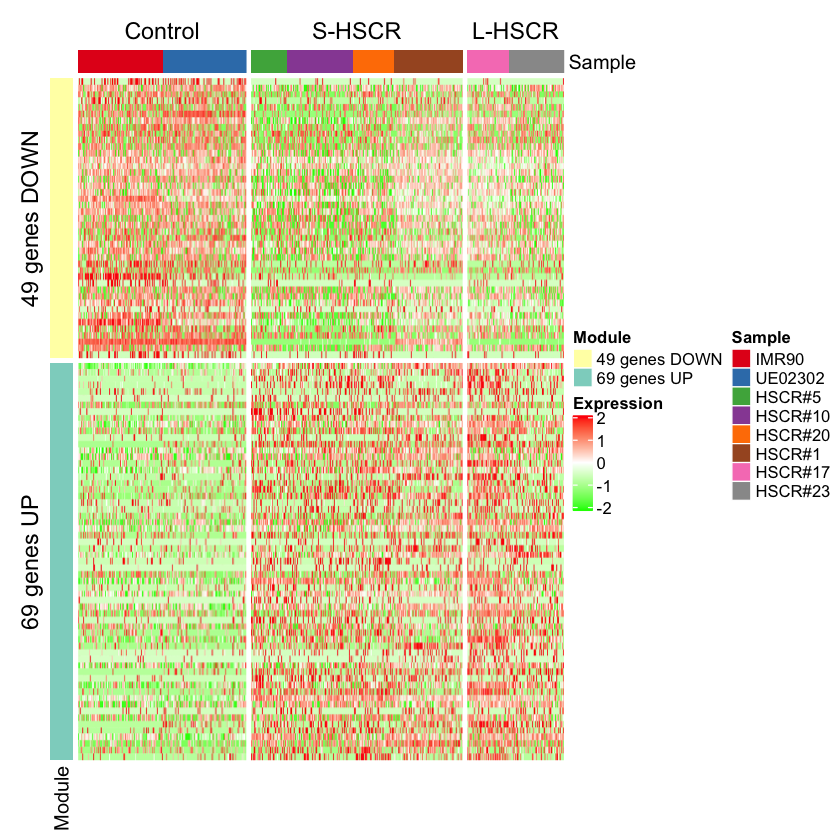

In [96]:
ht

In [97]:
pdf("manuscript/HSCR.heatmap.common.risk.pdf", width = 7, height = 7)
draw(ht)
dev.off()

pdf 
  2

### S only

In [217]:
tmp.genes <- rbind(data.frame(gene=S.up, GeneSet="S-HSCR risk genes (180g UP)"),
      data.frame(gene=S.down, GeneSet="S-HSCR risk genes (227g Down)")
)

#### left

In [218]:
left.colors <- brewer.pal(5, "Set3")[3:4]
names(left.colors) <- c("S-HSCR risk genes (180g UP)", "S-HSCR risk genes (227g Down)")

In [219]:
table(tmp.genes$GeneSet)


  S-HSCR risk genes (180g UP) S-HSCR risk genes (227g Down) 
                          180                           227 

In [220]:
la <- rowAnnotation(
    Module = tmp.genes$GeneSet,
    col = list(Module = left.colors)
)

In [221]:
# set common
anno$col$type <- plyr::mapvalues(anno$col$Sample, 
                        from = c("IMR90","UE2302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23"),
                        to = c("Control","Control","S-HSCR","S-HSCR","S-HSCR","L-HSCR","L-HSCR","L-HSCR")
                        )

In [222]:
options(repr.plot.width=8, repr.plot.height=7)
ht <- Heatmap(scale.data[tmp.genes$gene, rownames(anno$col)], col = col_fun, name = "Expression",
        row_split = tmp.genes$GeneSet, column_split = anno$col$type, # layer_fun = layer_fun,
        top_annotation = ha, left_annotation = la,
        show_row_names = F, show_column_names = F, cluster_rows = F, cluster_columns = F)

In [223]:
# ht

In [224]:
pdf("HSCR.heatmap.S-HSCR.risk.pdf", width = 8, height = 7)
draw(ht)
dev.off()

pdf 
  2

### L only

In [225]:
tmp.genes <- rbind(data.frame(gene=SL.up, GeneSet="L-HSCR risk genes (497g UP)"),
      data.frame(gene=SL.down, GeneSet="L-HSCR risk genes (304g Down)")
)

#### left

In [226]:
left.colors <- brewer.pal(6, "Set3")[5:6]
names(left.colors) <- c("L-HSCR risk genes (497g UP)", "L-HSCR risk genes (304g Down)")

In [227]:
table(tmp.genes$GeneSet)


L-HSCR risk genes (304g Down)   L-HSCR risk genes (497g UP) 
                          304                           497 

In [228]:
la <- rowAnnotation(
    Module = tmp.genes$GeneSet,
    col = list(Module = left.colors)
)

In [229]:
# set common
anno$col$typeL <- plyr::mapvalues(anno$col$Sample, 
                        from = c("IMR90","UE2302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23"),
                        to = c("non L-HSCR","non L-HSCR","non L-HSCR","non L-HSCR","non L-HSCR","L-HSCR","L-HSCR","L-HSCR")
                        )

In [230]:
options(repr.plot.width=8, repr.plot.height=7)
ht <- Heatmap(scale.data[tmp.genes$gene, rownames(anno$col)], col = col_fun, name = "Expression",
        row_split = tmp.genes$GeneSet, column_split = anno$col$typeL, # layer_fun = layer_fun,
        top_annotation = ha, left_annotation = la,
        show_row_names = F, show_column_names = F, cluster_rows = F, cluster_columns = F)

In [231]:
# ht

In [232]:
pdf("HSCR.heatmap.L-HSCR.risk.pdf", width = 8, height = 7)
draw(ht)
dev.off()

pdf 
  2

### RNA splicing

In [ ]:
# go to load data - pure cluster1

In [5]:
RNAsplicing.up

[1] "ALYREF"  "CASC3"   "CIRBP"   "DDX39A"  "GEMIN4"  "GEMIN5"  "HNRNPA1"
 [8] "HNRNPH1" "KHDRBS1" "KHSRP"   "LSM4"    "LSM7"    "NCL"     "POLR2A" 
[15] "PQBP1"   "PRPF6"   "PRPF19"  "PTBP1"   "RALY"    "RAVER1"  "RBFOX2" 
[22] "RBM42"   "RPS26"   "RRP1B"   "SART1"   "SF3A1"   "SF3B5"   "SRRM2"  
[29] "SRRM4"   "SRSF2"   "SUGP1"   "SYNCRIP" "TTF2"    "U2AF1"   "U2AF2"  
[36] "UBL5"    "USB1"

In [6]:
RNAsplicing.up <- sort(RNAsplicing.up)

In [7]:
length(RNAsplicing.up)

[1] 37

In [8]:
tmp.genes <- rbind(data.frame(gene=RNAsplicing.up, GeneSet="RNA splicing")
)

In [12]:
left.colors <- brewer.pal(5, "Set3")[1]
names(left.colors) <- c("RNA splicing")

In [13]:
table(tmp.genes$GeneSet)


RNA splicing 
          37 

In [14]:
la <- rowAnnotation(
    Module = tmp.genes$GeneSet,
    col = list(Module = left.colors)
)

In [18]:
RNAsplicer.exprM <- scale.data[tmp.genes$gene, rownames(anno$col)]

In [19]:
# for correlation analysis, with splice events
save(RNAsplicer.exprM, file = "keyRdata/RNAsplicer.exprM.Rdata")

In [17]:
options(repr.plot.width=7, repr.plot.height=7)
ht <- Heatmap(scale.data[tmp.genes$gene, rownames(anno$col)], col = col_fun, name = "Expression",
        row_split = tmp.genes$GeneSet, column_split = anno$col$common, # layer_fun = layer_fun,
        top_annotation = ha, left_annotation = la,
        show_row_names = T, show_column_names = F, cluster_rows = F, cluster_columns = F)

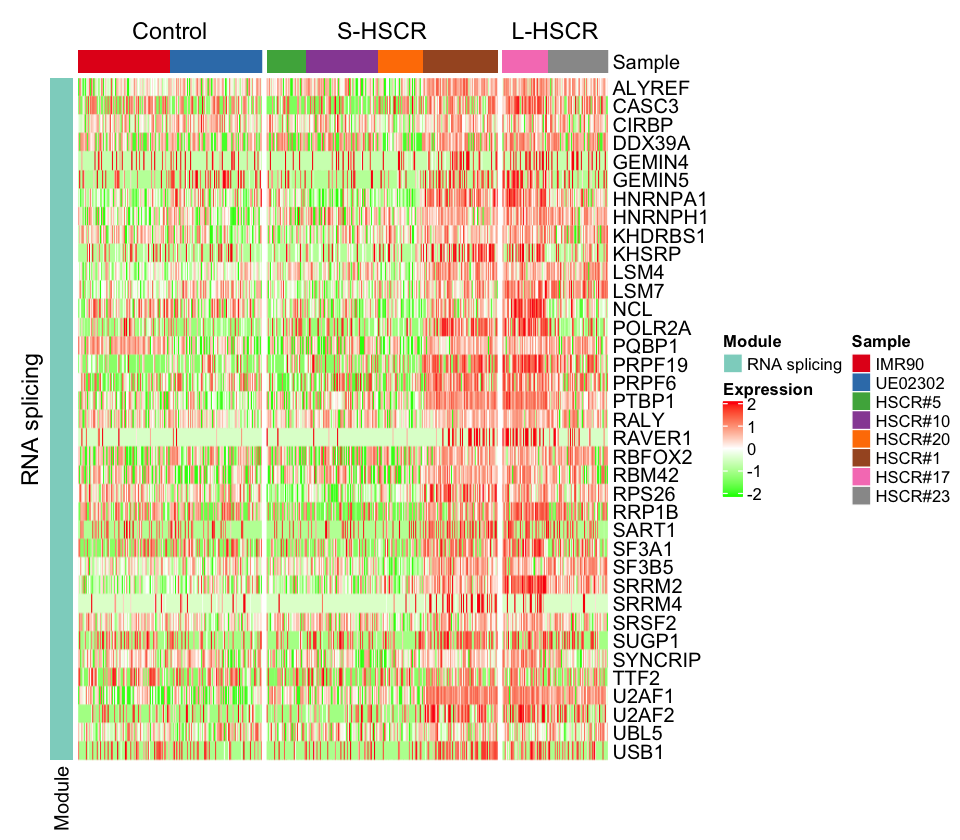

In [20]:
options(repr.plot.width=8, repr.plot.height=7)
ht

In [21]:
pdf("manuscript/HSCR.heatmap.RNAsplicing.pdf", width = 8, height = 7)
draw(ht)
dev.off()

pdf 
  2

# SCENIC - paired staining

In [3]:
library(scater)

In [9]:
tsne.pure.c1$HDAC1 <- logcounts(sce_HSCR_pure)["HDAC1",]

In [10]:
head(tsne.pure.c1)

X         Y          colour_by cellGroup HDAC1   
X20c7.E6.A10  4.278686 -2.3820968 S-HSCR    HSCR_20c7 0.000000
X20c7.E6.A1  -3.247040 -7.0249415 S-HSCR    HSCR_20c7 5.779522
X20c7.E6.A12  4.500908 -1.9698636 S-HSCR    HSCR_20c7 0.000000
X20c7.E6.A14 -1.877570 -2.0246146 S-HSCR    HSCR_20c7 3.799087
X20c7.E6.A18 -3.933196  0.3455967 S-HSCR    HSCR_20c7 6.047451
X20c7.E6.A20 -4.286198  0.2315421 S-HSCR    HSCR_20c7 0.000000

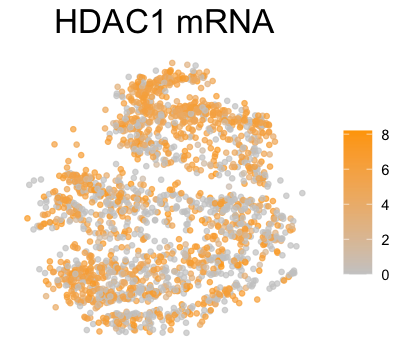

In [64]:
options(repr.plot.width=3.4, repr.plot.height=3)
p1 <- ggplot(tsne.pure.c1, aes(x=X, y=Y, color=HDAC1)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    # geom_point(size=2, alpha=0.7, shape = 21, stroke = 0.01, color="grey70") +
    geom_point(size=1.2, alpha=0.7) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    # theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    labs(x = "",y = "", title = "HDAC1 mRNA") +
    theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # title position
    theme(plot.title = element_text(hjust = 0.5, face = "plain", size=20)) +
    scale_color_gradient(low = "gray80", high = "orange")
    # scale_colour_gradient(low = "gray80", high = "orange") #+
    #scale_colour_gradient2(low = "gray80", mid = "orange", high = "red")
p1

In [65]:
ggsave(filename = "manuscript/HSCR.tSNE.HDAC1.mRNA.pdf", width = 3.4, height = 3)

In [15]:
# set my binarized value of HDAC1 using new threshold
tsne.pure.c1$HDAC1_r <- regulon.auc[rownames(tsne.pure.c1),"HDAC1"]
tsne.pure.c1$HDAC1_rb2 <- as.integer(tsne.pure.c1$HDAC1_r>0.072)

In [18]:
tsne.pure.c1$HDAC1_rb2 <- plyr::mapvalues(tsne.pure.c1$HDAC1_rb2, from = c(0,1), to = c("OFF", "ON"))

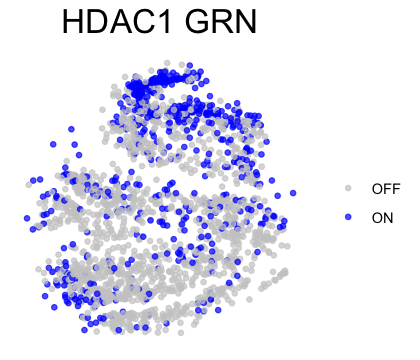

In [58]:
options(repr.plot.width=3.5, repr.plot.height=3)
p2 <- ggplot(tsne.pure.c1, aes(x=X, y=Y, color=factor(HDAC1_rb2))) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    # geom_point(size=2, alpha=0.7, shape = 21, stroke = 0.01, color="grey70") +
    geom_point(size=1.2, alpha=0.7) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    # theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    labs(x = "",y = "", title = "HDAC1 GRN") +
    theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # title position
    theme(plot.title = element_text(hjust = 0.5, face = "plain", size=20)) +
    scale_color_manual(values = c("gray80","blue"))
    # scale_fill_gradient(low = "gray90", high = "blue")
    # scale_color_gradient2(low = "gray95", mid = "white", high = "blue")
p2

In [59]:
ggsave(filename = "manuscript/HSCR.tSNE.HDAC1.GRN.pdf", width = 3.5, height = 3)

In [79]:
tsne.pure.c1$group <- factor(tsne.pure.c1$group, levels =  c("IMR90","UE02302","HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23"))

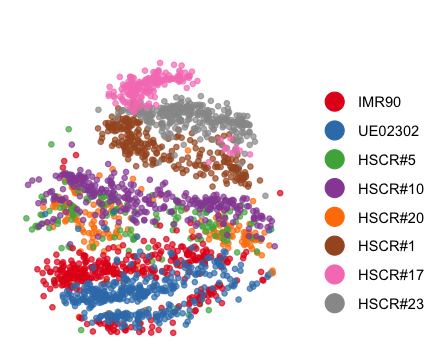

In [81]:
options(repr.plot.width=3.7, repr.plot.height=3)
p3 <- ggplot(tsne.pure.c1, aes(x=X, y=Y, color=group)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    # geom_point(size=2, alpha=0.7, shape = 21, stroke = 0.01, color="grey70") +
    geom_point(size=1.2, alpha=0.7) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "tSNE-1",y = "tSNE-2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    # change legend dot size
    guides(colour = guide_legend(override.aes = list(size=5, alpha=1))) +
    # theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # title position
    theme(plot.title = element_text(hjust = 0.5, face = "plain", size=20)) +
    # scale_color_manual(values = c("gray80","blue"))
    # scale_fill_gradient(low = "gray90", high = "blue")
    # scale_color_gradient2(low = "gray95", mid = "white", high = "blue")
    scale_color_manual(values=brewer.pal(9,"Set1")[c(1:5,7:9)])
p3

In [82]:
ggsave(filename = "manuscript/HSCR.tSNE.pdf", width = 3.7, height = 3)

In [21]:
head(tsne.pure.c1)

X         Y          colour_by cellGroup HDAC1    HDAC1_r   
X20c7.E6.A10  4.278686 -2.3820968 S-HSCR    HSCR_20c7 0.000000 0.05380029
X20c7.E6.A1  -3.247040 -7.0249415 S-HSCR    HSCR_20c7 5.779522 0.08930213
X20c7.E6.A12  4.500908 -1.9698636 S-HSCR    HSCR_20c7 0.000000 0.05803861
X20c7.E6.A14 -1.877570 -2.0246146 S-HSCR    HSCR_20c7 3.799087 0.04533379
X20c7.E6.A18 -3.933196  0.3455967 S-HSCR    HSCR_20c7 6.047451 0.05685905
X20c7.E6.A20 -4.286198  0.2315421 S-HSCR    HSCR_20c7 0.000000 0.06866145
             HDAC1_rb2
X20c7.E6.A10 OFF      
X20c7.E6.A1  ON       
X20c7.E6.A12 OFF      
X20c7.E6.A14 OFF      
X20c7.E6.A18 OFF      
X20c7.E6.A20 OFF

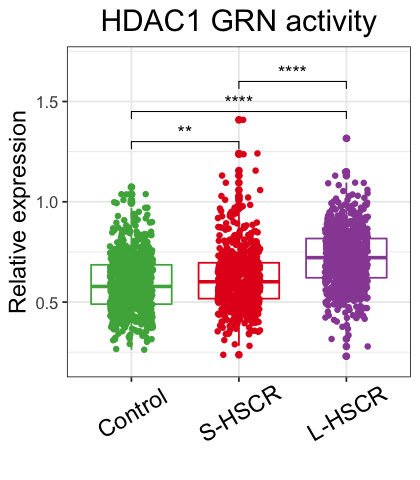

In [66]:
library(ggpubr)
my_comparisons <- list(c("Control","S-HSCR"), c("Control","L-HSCR"), c("S-HSCR", "L-HSCR"))

options(repr.plot.width=3.5, repr.plot.height=4)
p1 <- ggplot(tsne.pure.c1, aes(x=colour_by, y=HDAC1_r2, color=colour_by)) + 
        geom_boxplot() + 
        theme_bw() +
        labs(x = "", y = "Relative expression", title = "HDAC1 GRN activity") +
        geom_jitter(shape=16, position=position_jitter(0.2)) +
        theme(legend.position = "none") + 
        theme(axis.text.x  = element_text(face="plain", angle=30, size = 14, color = "black", vjust=0.6),
            axis.text.y  = element_text(size = 10),
            axis.title.y = element_text(size = 14)) +
        theme(plot.title = element_text(hjust = 0.5, size = 18)) +
        # scale_fill_manual(values=brewer.pal(9,"Paired"))
        # scale_color_manual(values=c('#4DAF4A','#E41A1C','gray50','#984EA3')) +
        scale_color_manual(values=c('#4DAF4A','#E41A1C','#984EA3')) +
        # stat_compare_means(method = "anova", label.y = 1) + # global
        stat_compare_means(comparisons = list(c("Control","S-HSCR")), label.y = 1.3, label = "p.signif",method = "wilcox.test") + 
        stat_compare_means(comparisons = list(c("Control","L-HSCR")), label.y = 1.45, label = "p.signif",method = "wilcox.test") +
        stat_compare_means(comparisons = list(c("S-HSCR", "L-HSCR")), label.y = 1.6, label = "p.signif",method = "wilcox.test")  +         
        scale_y_continuous(limits = c(0.2, 1.7))
p1

In [67]:
ggsave(filename = "manuscript/HSCR.HDAC1.GRN.activity.pdf", width = 3.5, height = 4)

# PCA density

## load data

In [21]:
pca_HSCR2 <- read.csv("keyRdata/pca_HSCR2.csv", row.names = 1)
dim(pca_HSCR2)
head(pca_HSCR2)

[1] 2136    7

x         y          colour_by X1         X2        X3          
X20c7.E6.A10 -5.064076 -21.225129 HSCR_20c7 -21.225129 -5.064076 -7.180968199
X20c7.E6.A1  10.745995  14.506839 HSCR_20c7  14.506839 10.745995 -0.003673469
X20c7.E6.A12 -8.263122 -27.355068 HSCR_20c7 -27.355068 -8.263122 -5.455187792
X20c7.E6.A14  5.785751  -4.216199 HSCR_20c7  -4.216199  5.785751  2.651141461
X20c7.E6.A18  9.261684  12.264479 HSCR_20c7  12.264479  9.261684 14.696119913
X20c7.E6.A20 -4.351595   2.436761 HSCR_20c7   2.436761 -4.351595 14.790558993
             X4        
X20c7.E6.A10  -9.081750
X20c7.E6.A1  -10.148741
X20c7.E6.A12  -6.227167
X20c7.E6.A14   7.550708
X20c7.E6.A18  -6.444546
X20c7.E6.A20  -6.344806

In [22]:
pca_HSCR2$cellGroup <- pca_HSCR2$colour_by

pca_HSCR2$colour_by <- plyr::mapvalues(pca_HSCR2$colour_by, 
                        from = c("IMR_ENCC","UE_ENCC","HSCR_5c3","HSCR_20c7","HSCR_10c2","HSCR_1c11","HSCR_17c8","HSCR_23c9"),
                        to = c("IMR90","UE02302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23"))

pca_HSCR2$colour_by <- factor(pca_HSCR2$colour_by, levels = c("IMR90","UE02302",
                                                "HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23"))

pca_HSCR2$severity <- plyr::mapvalues(pca_HSCR2$cellGroup,
                                         from = c("IMR_ENCC", "UE_ENCC", "HSCR_5c3","HSCR_20c7","HSCR_10c2","HSCR_1c11","HSCR_17c8","HSCR_23c9"),
                                         to = c("Control", "Control", "S-HSCR","S-HSCR","S-HSCR","S-HSCR","L-HSCR","L-HSCR"))

pca_HSCR2$severity <- factor(pca_HSCR2$severity, levels = c("Control", "S-HSCR", "L-HSCR"))

In [23]:
head(pca_HSCR2)

x         y          colour_by X1         X2        X3          
X20c7.E6.A10 -5.064076 -21.225129 HSCR#20   -21.225129 -5.064076 -7.180968199
X20c7.E6.A1  10.745995  14.506839 HSCR#20    14.506839 10.745995 -0.003673469
X20c7.E6.A12 -8.263122 -27.355068 HSCR#20   -27.355068 -8.263122 -5.455187792
X20c7.E6.A14  5.785751  -4.216199 HSCR#20    -4.216199  5.785751  2.651141461
X20c7.E6.A18  9.261684  12.264479 HSCR#20    12.264479  9.261684 14.696119913
X20c7.E6.A20 -4.351595   2.436761 HSCR#20     2.436761 -4.351595 14.790558993
             X4         cellGroup severity
X20c7.E6.A10  -9.081750 HSCR_20c7 S-HSCR  
X20c7.E6.A1  -10.148741 HSCR_20c7 S-HSCR  
X20c7.E6.A12  -6.227167 HSCR_20c7 S-HSCR  
X20c7.E6.A14   7.550708 HSCR_20c7 S-HSCR  
X20c7.E6.A18  -6.444546 HSCR_20c7 S-HSCR  
X20c7.E6.A20  -6.344806 HSCR_20c7 S-HSCR

## PCA

In [24]:
melt_data <- reshape::melt(pca_HSCR2, id.vars = c("x", "y", "colour_by","cellGroup","severity"))
melt_data$variable <- plyr::mapvalues(x = melt_data$variable,from = paste("X",1:4,sep=""),to = paste("PC",1:4,sep=""))
head(melt_data)

x         y          colour_by cellGroup severity variable value     
1 -5.064076 -21.225129 HSCR#20   HSCR_20c7 S-HSCR   PC1      -21.225129
2 10.745995  14.506839 HSCR#20   HSCR_20c7 S-HSCR   PC1       14.506839
3 -8.263122 -27.355068 HSCR#20   HSCR_20c7 S-HSCR   PC1      -27.355068
4  5.785751  -4.216199 HSCR#20   HSCR_20c7 S-HSCR   PC1       -4.216199
5  9.261684  12.264479 HSCR#20   HSCR_20c7 S-HSCR   PC1       12.264479
6 -4.351595   2.436761 HSCR#20   HSCR_20c7 S-HSCR   PC1        2.436761

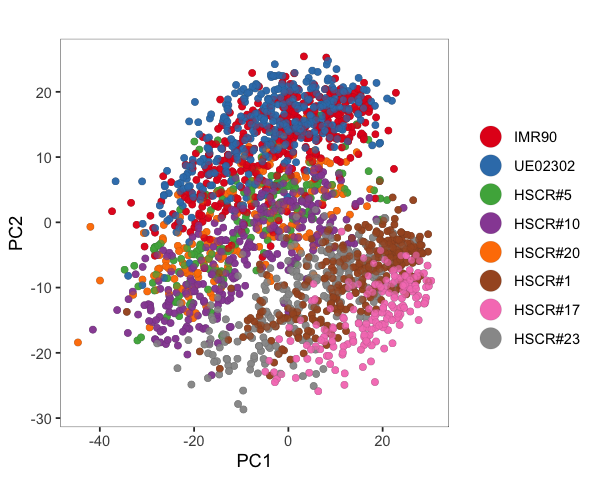

In [27]:
# show samples
options(repr.plot.width=5, repr.plot.height=4)
p <- ggplot(melt_data, aes(x=y, y=x, fill=colour_by)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    geom_point(size=2, alpha=0.6, shape = 21, colour = "grey20", stroke = 0.05) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 4.5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "PC1",y = "PC2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    # theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    #theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    #    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    #    labs(x = "",y = "", title = "") +
    #theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # change legend dot size
    guides(fill = guide_legend(override.aes = list(size=6, alpha=1))) +
    #
    scale_fill_manual(values=brewer.pal(9,"Set1")[c(1:5,7:9)])
p

In [28]:
ggsave(filename = "HSCR.PCA.NConly.samples.pdf", width = 5, height = 4)

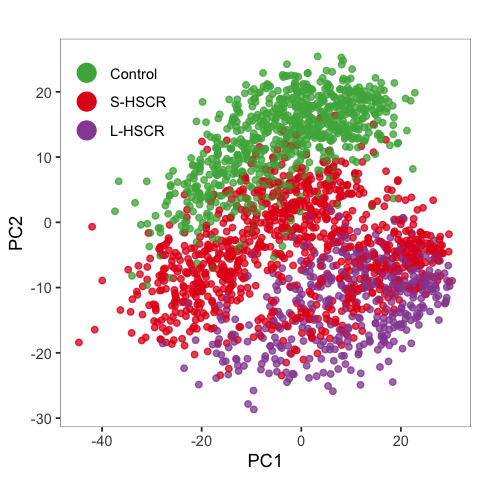

In [35]:
# show samples
options(repr.plot.width=4, repr.plot.height=4)
p <- ggplot(melt_data, aes(x=y, y=x)) +
    # facet_grid(cols = vars(variable)) +
    # facet_wrap( ~ variable, ncol=2) + # error in border
    # geom_point(size=2, alpha=0.6, shape = 21, colour = "grey20", stroke = 0.05) +
    geom_point(size=1.5, alpha=0.3, aes(fill=severity, color=severity)) +
    # geom_point(size=2, alpha=0.6, shape = 21, colour = "grey10", stroke = 0.0001, aes(fill=severity)) +
    # geom_density_2d(color='black', size=0.05, alpha=0.15) +
    # geom_text(data = centers, mapping = aes(label = cluster), size = 4.5, color="black") +
    # geom_line(data=pc.line1, color='red', size=0.5) +
    labs(x = "PC1",y = "PC2", title = "") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    theme(legend.title=element_blank()) +
    # theme(legend.position = "none") +
    theme(strip.background = element_rect(fill = "gray97", color = NA)) + # strip background color
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11)) +
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) + #line size
    # empty border, ticks, text
    # theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    #    panel.grid.minor = element_blank(), axis.line = element_blank()) +
    #    labs(x = "",y = "", title = "") +
    # theme(axis.title=element_blank(), axis.text=element_blank(), axis.ticks=element_blank()) +
    # change legend dot size
    guides(fill = guide_legend(override.aes = list(size=5, alpha = 1))) +
    theme(legend.title=element_blank(), legend.position = c(0.15, 0.85), legend.background=element_blank()) +
    #
    scale_color_manual(values=severity.colors) +
    scale_fill_manual(values=severity.colors)
p

In [36]:
ggsave(filename = "Figures/Fig. 2B-HSCR.PCA.NConly.severity.pdf", width = 4, height = 4)

In [103]:
melt_data <- subset(melt_data, variable %in% c("PC1", "PC2"))

Warning message:
“Removed 2007 rows containing non-finite values (stat_boxplot).”


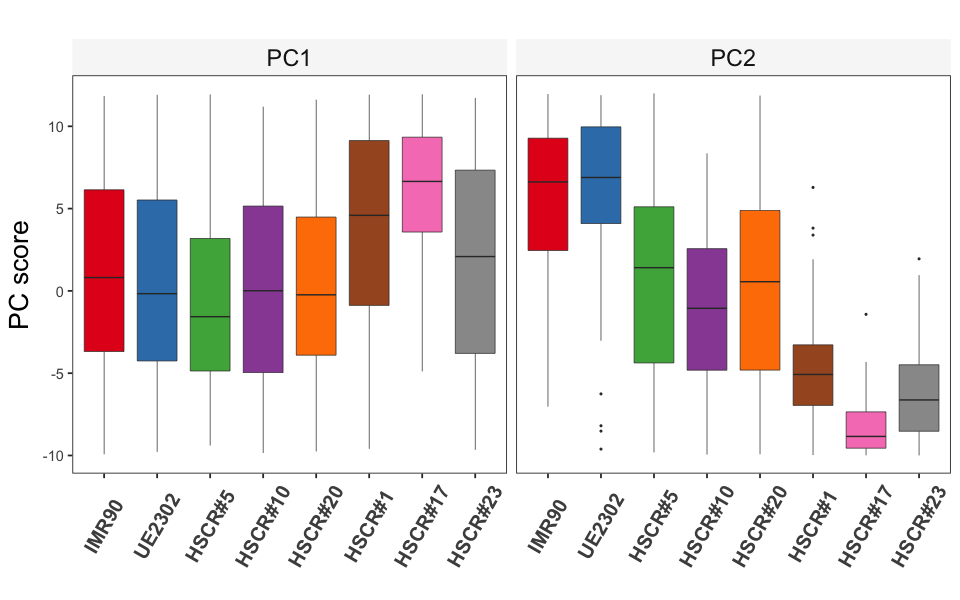

In [104]:
options(repr.plot.width=8, repr.plot.height=5)
#library(ggpubr)
sig_pseudog <- ggplot(melt_data, aes(x=colour_by, y=value, fill=colour_by)) +
  # facet_grid(cols = vars(variable)) +
  theme_bw() +
  facet_wrap( ~ variable, ncol=2) + # error in border
  geom_boxplot(outlier.size=0.2, size=0.2) + # 
  #geom_jitter(width = 0.3, size=0.001, aes(color=colour_by)) +#  +
  #stat_compare_means(label = "p.signif", method = "wilcox.test", ref.group = "UE_ENCC",label.y = 11) +
  #stat_compare_means(label.y = 1.5, label.x = 2.5) +    # Add global p-value
  scale_fill_manual(values=sample.colors) +
  #scale_color_manual(values=myColors_human_4groups) +
  theme(legend.position = "none", 
        axis.text.x = element_text(angle = 60, size = 12, vjust = 0.5, face = "bold"),
        axis.title.y = element_text(size = 16)) +
  # just remove inside grid
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
  #
  # strip
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11),
          strip.background = element_rect(fill = "gray97", color = NA)) +
  #
  labs(x = "", y = "PC score", title = "") +
  scale_y_continuous(limits = c(-10, 12))
sig_pseudog

In [93]:
ggsave(filename = "HSCR.PCA1_2.NConly.barplot.pdf", width = 8, height = 5)

Warning message:
“Removed 2007 rows containing non-finite values (stat_boxplot).”


## density plot

In [37]:
pca_HSCR2$diseaseScoreRaw <- -pca_HSCR2$X2 + pca_HSCR2$X1
pca_HSCR2 <- pca_HSCR2[order(pca_HSCR2$diseaseScoreRaw, decreasing = F),]
pca_HSCR2$diseaseScore <- seq(0, 1, length.out = nrow(pca_HSCR2))

In [38]:
head(pca_HSCR2)

x          y         colour_by X1        X2         X3        
UE.E1.P3      6.2859338 -36.66004 UE02302   -36.66004  6.2859338  -9.767583
X20c7.E6.C20 -0.6792527 -42.00144 HSCR#20   -42.00144 -0.6792527   1.943735
IMR90.E2.B14  1.6898474 -37.40706 IMR90     -37.40706  1.6898474  -3.894050
UE.E1.O17    18.4468633 -19.82741 UE02302   -19.82741 18.4468633 -10.518007
UE.E1.O13     6.2743164 -31.02882 UE02302   -31.02882  6.2743164 -14.324001
UE.E1.K20    15.4651673 -21.05034 UE02302   -21.05034 15.4651673  -8.146098
             X4        cellGroup severity diseaseScoreRaw diseaseScore
UE.E1.P3      6.604730 UE_ENCC   Control  -42.94597       0.0000000000
X20c7.E6.C20 22.261787 HSCR_20c7 S-HSCR   -41.32219       0.0004683841
IMR90.E2.B14 10.911051 IMR_ENCC  Control  -39.09691       0.0009367681
UE.E1.O17     3.859211 UE_ENCC   Control  -38.27428       0.0014051522
UE.E1.O13     2.994452 UE_ENCC   Control  -37.30314       0.0018735363
UE.E1.K20    18.269000 UE_ENCC   Control  -36.51550       0.0023419204

In [53]:
pca_HSCR2$colour_by <- factor(pca_HSCR2$colour_by, levels = rev(sample.order))

In [58]:
rev(sample.order)

[1] "HSCR#6"  "HSCR#23" "HSCR#17" "HSCR#1"  "HSCR#20" "HSCR#10" "HSCR#5" 
[8] "UE02302" "IMR90"

In [65]:
pca_HSCR2$colour_by <- factor(pca_HSCR2$colour_by, levels = c('UE02302','IMR90','HSCR#20','HSCR#5','HSCR#10','HSCR#23','HSCR#17','HSCR#1'))

In [66]:
severity.colors

[1] "#4DAF4A" "#E41A1C" "#984EA3"

In [74]:
severity.colors3 <- rev(c(rep('#4DAF4A', 2), rep('#E41A1C',3), rep('#984EA3', 2), 'gray50'))

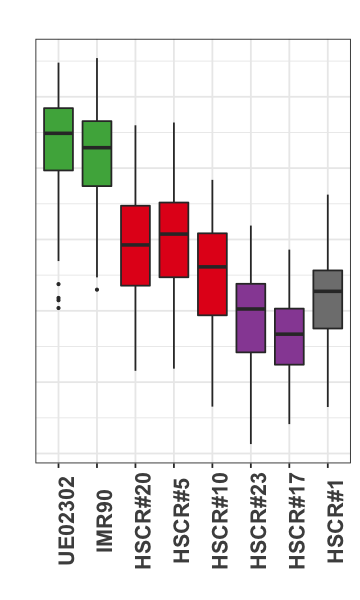

In [95]:
options(repr.plot.width=3, repr.plot.height=5)
p2 <- ggplot(pca_HSCR2, aes(x=colour_by, y=X2, fill=colour_by)) +
  # geom_density(alpha=0.6, bw=2.5) +
  geom_boxplot(outlier.size = 0.5) +
  theme_bw() +
  # just remove inside grid
  # theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
  # scale_color_manual(values=rev(severity.colors3)) +
  scale_fill_manual(values=rev(severity.colors3)) +
  theme(#axis.line.y=element_blank(), axis.title.y=element_blank(), 
        axis.ticks.y=element_blank(),axis.text.y=element_blank(),
       # legend.title=element_blank(), legend.key.size = unit(0.5, "cm"), legend.spacing.x = unit(0.2, 'cm')
       ) +
  #xlab("human pseudotime") +
  theme(# axis.text.y = element_text(angle = 0, size = 10, face = "plain"),
        axis.text.x = element_text(angle = 90, size = 13, face = "bold")
       ) +
  labs(x = "", y = "", title = "") +
  theme(legend.position = "none")
  #scale_x_continuous(limits = c(0,1), breaks=seq(0,1,length.out = 6), expand = c(0,0)) 
p2

In [96]:
ggsave(filename = "Figures/Fig. 1-HSCR.PC2.score.boxplot.pdf", width = 3, height = 5)

## gene expression line

- 'NOTCH3''GLI3''EFNB2''FRZB''NR2F1''HES4''HEY2'
- 'RFC3''ORC3''GPC4''FHL1'
- 'RPL18''RPL6''RPLP0''E2F1''RPS16''RPS19''RPL18A''RPL19''CASC3''RPS12''RPL24''RPS15''RPS10''LSM7''DHX9''ANP32A''RPS11''RPL13A''RPL10''RPL7A''LARP1''RPL8''RPL13''RPLP2''EXOSC4''ZFP36L1''SECISBP2''GSPT2''RPL12''MTOR''HSPA1A''UBA52''RPL41''RPS28''PTBP1''U2AF2''POLR2E''POLR2F''PRPF6''PRPF19''COIL''GTF2F1''RALY''AAR2''TGS1''CPSF4''USP49''SRRM2''SF3B5''POLR2A''ALYREF''SMARCD1''GRWD1''MAP1S''HMGA1''TP53''POM121''NCOR2''NUP62'
- 'COX7A2''COX7A2L''COX7B''ETFA''UQCRB''NDUFAF2''NDUFS4''CYB5A''SLC25A18''MDH1''HEXB''HEBP2''RAB18''VAPA''PSMA2''FRK''PSMD14''RAP1B''ACTR10''DYNLT1''CD47''MRPL50''RARS2''MRPS18C''MRPS22''MRPL42'

In [86]:
tmp.genes <- c("FOXO1","ZFP36L2","ZNF385A","SOX11","GLI3","BCL11A","TUBB3","FLNA","HEY2",
               "HEY1","RAMP2","NR2F2","TFAP2A","CRLF1","STAMBP","LMOD3","NUP107","TMEM14C","CCNB1IP1") # "CUL3", 

In [3]:
# Fig. 2
tmp.genes <- c("NOTCH3","GLI3",
               "ORC3","GPC4",
               "PTBP1","U2AF2",
               "COX7B","MDH1")

In [1]:
tmp.genes <- c("HDAC1")
tmp.genes <- c("HDAC1","GLI3","BCL11A","HEY2","SOX11","TFAP2A","TUBB3")

In [5]:
library(scater)

In [8]:
head(pca_HSCR2)

x          y         colour_by X1        X2         X3        
UE.E1.P3      6.2859338 -36.66004 UE02302   -36.66004  6.2859338  -9.767583
X20c7.E6.C20 -0.6792527 -42.00144 HSCR#20   -42.00144 -0.6792527   1.943735
IMR90.E2.B14  1.6898474 -37.40706 IMR90     -37.40706  1.6898474  -3.894050
UE.E1.O17    18.4468633 -19.82741 UE02302   -19.82741 18.4468633 -10.518007
UE.E1.O13     6.2743164 -31.02882 UE02302   -31.02882  6.2743164 -14.324001
UE.E1.K20    15.4651673 -21.05034 UE02302   -21.05034 15.4651673  -8.146098
             X4        cellGroup severity diseaseScoreRaw diseaseScore group  
UE.E1.P3      6.604730 UE_ENCC   Control  -42.94597       0.0000000000 UE02302
X20c7.E6.C20 22.261787 HSCR_20c7 S-HSCR   -41.32219       0.0004683841 HSCR#20
IMR90.E2.B14 10.911051 IMR_ENCC  Control  -39.09691       0.0009367681 IMR90  
UE.E1.O17     3.859211 UE_ENCC   Control  -38.27428       0.0014051522 UE02302
UE.E1.O13     2.994452 UE_ENCC   Control  -37.30314       0.0018735363 UE02302
UE.E1.K20    18.269000 UE_ENCC   Control  -36.51550       0.0023419204 UE02302
             z pseudotime 
UE.E1.P3     1  -6.2859338
X20c7.E6.C20 1   0.6792527
IMR90.E2.B14 1  -1.6898474
UE.E1.O17    1 -18.4468633
UE.E1.O13    1  -6.2743164
UE.E1.K20    1 -15.4651673

In [9]:
tmp.df <- aggregate(. ~ group, pca_HSCR2[,c("group","pseudotime")], mean)
rownames(tmp.df) <- tmp.df$group
tmp.df[c("IMR90","UE02302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23"),]$pseudotime

[1] -11.5604671 -13.5448976   0.1411860   0.6819481   4.8157399   8.4249779
[7]  13.7390108  11.1320451

In [10]:
# normalize to 0-1
pca_HSCR2$pseudotime <- (pca_HSCR2$pseudotime - min(pca_HSCR2$pseudotime)) / (max(pca_HSCR2$pseudotime) - min(pca_HSCR2$pseudotime))

In [11]:
pseudo.df <- data.frame(sample=pca_HSCR2$colour_by, pseudotime=pca_HSCR2$pseudotime, row.names = rownames(pca_HSCR2))
pseudo.df <- as.data.frame(cbind(pseudo.df, t(logcounts(sce_HSCR_pure)[tmp.genes, rownames(pseudo.df)])))
pseudo.df.melt <- reshape2::melt(pseudo.df, id.vars = c("sample", "pseudotime"))

In [14]:
tmp.colors <- brewer.pal(12, "Set3")[c(7,3,6,4)]
tmp.colors

[1] "#B3DE69" "#BEBADA" "#FDB462" "#FB8072"

In [15]:
tmp.colors2 <- rep(tmp.colors, each = 2)

In [16]:
head(pseudo.df.melt)
dim(pseudo.df.melt)

sample  pseudotime variable value   
1 UE02302 0.3537255  NOTCH3   3.047887
2 HSCR#20 0.4824593  NOTCH3   2.857981
3 IMR90   0.4386725  NOTCH3   0.000000
4 UE02302 0.1289617  NOTCH3   0.000000
5 UE02302 0.3539402  NOTCH3   1.422233
6 UE02302 0.1840707  NOTCH3   0.000000

[1] 15789     4

`geom_smooth()` using formula 'y ~ x'



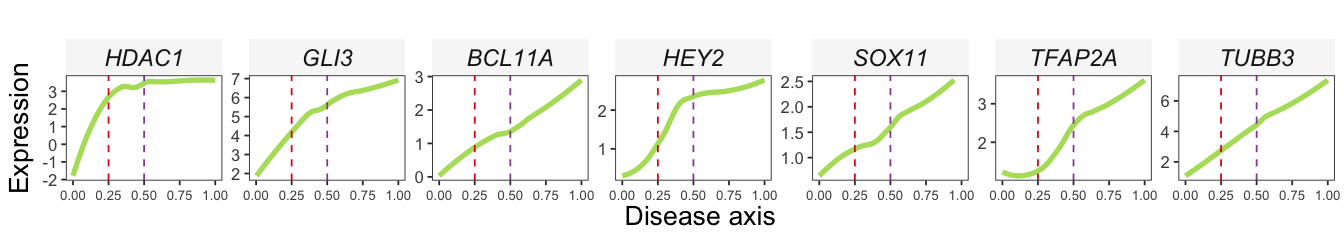

In [40]:
# options(repr.plot.width=4, repr.plot.height=8)
options(repr.plot.width=1.6*7, repr.plot.height=2)
ggplot(pseudo.df.melt, aes(x=pseudotime, y=value)) + 
  facet_wrap( ~ variable, ncol=7, scales="free_y") +
  # geom_point(aes(x = pseudotime, y = value), color="gray50", size = 0.5) +
  geom_smooth(method = 'loess', se=F, alpha=0.15, size=1.5, weight=1, span = 0.7, color="#B3DE69") +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Disease axis", y = "Expression", title = "") +
  # strip
  theme(strip.placement = "outside", strip.text.x = element_text(face="italic", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11),
          strip.background = element_rect(fill = "gray97", color = NA)) +
  # just remove inside grid
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  # basic font size
  theme(legend.position = "none", 
        axis.text.x = element_text(angle = 0, size = 8, vjust = 0.5, face = "plain"),
        axis.text.y = element_text(angle = 0, size = 10, vjust = 0.5, face = "plain"),
        axis.title = element_text(size = 16)) +
  geom_vline(xintercept=0.25, colour="#E41A1C", linetype="dashed") +
  geom_vline(xintercept=0.50, colour="#984EA3", linetype="dashed") +
  scale_color_manual(values = tmp.colors2)

In [41]:
ggsave(filename = "manuscript/HSCR.HDAC1.line.expression3.pdf", width = 1.6*7, height = 2)

`geom_smooth()` using formula 'y ~ x'



`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



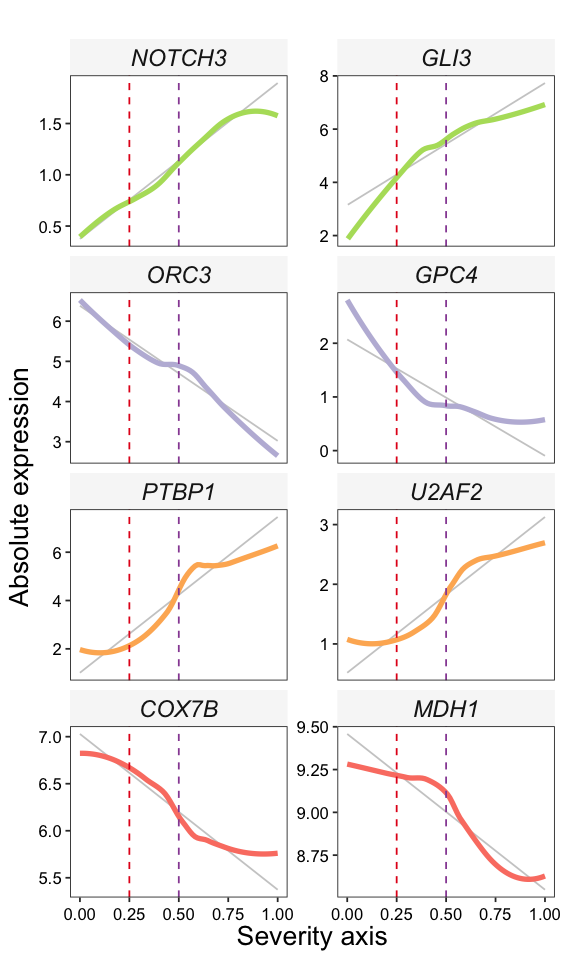

In [18]:
options(repr.plot.width=4.7, repr.plot.height=8)
ggplot(pseudo.df.melt, aes(x=pseudotime, y=value)) + 
  facet_wrap( ~ variable, ncol=2, scales="free_y") +
  # geom_point(aes(x = pseudotime, y = value), color="gray50", size = 0.5) +
  geom_smooth(method = "lm", se = F, color="gray80", size = 0.5) + # add linear regression line
  geom_smooth(method = 'loess', se=F, alpha=0.15, size=1.5, weight=1, span = 0.7, aes(color=variable)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Severity axis", y = "Absolute expression", title = "") +
  # strip
  theme(strip.placement = "outside", strip.text.x = element_text(face="italic", size = 14), #italic
          strip.text.y = element_text(face="plain", size = 11),
          strip.background = element_rect(fill = "gray97", color = NA)) +
  # just remove inside grid
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  # basic font size
  theme(legend.position = "none", 
        axis.text.x  = element_text(face="plain", angle=0, size = 10, color = "black", vjust=0.5),
        axis.text.y  = element_text(face="plain", size = 10, color = "black"),
        axis.title =element_text(size = 16)) +
  geom_vline(xintercept=0.25, colour="#E41A1C", linetype="dashed") +
  geom_vline(xintercept=0.50, colour="#984EA3", linetype="dashed") +
  scale_color_manual(values = tmp.colors2)

In [19]:
ggsave(filename = "Figures/HSCR.key.genes.expression.pdf", width = 4.7, height = 8)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



## ggbeeswarm

In [4]:
set.seed(49)
library(ggplot2)
library(ggbeeswarm)

In [48]:
pca_HSCR2$z <- 1
pca_HSCR2$pseudotime <- -pca_HSCR2$X2 

In [49]:
head(pca_HSCR2, n = 3)

x          y         colour_by X1        X2         X3       
UE.E1.P3      6.2859338 -36.66004 UE02302   -36.66004  6.2859338 -9.767583
X20c7.E6.C20 -0.6792527 -42.00144 HSCR#20   -42.00144 -0.6792527  1.943735
IMR90.E2.B14  1.6898474 -37.40706 IMR90     -37.40706  1.6898474 -3.894050
             X4       cellGroup severity diseaseScoreRaw diseaseScore group   z
UE.E1.P3      6.60473 UE_ENCC   Control  -42.94597       0.0000000000 UE02302 1
X20c7.E6.C20 22.26179 HSCR_20c7 S-HSCR   -41.32219       0.0004683841 HSCR#20 1
IMR90.E2.B14 10.91105 IMR_ENCC  Control  -39.09691       0.0009367681 IMR90   1
             pseudotime
UE.E1.P3     -6.2859338
X20c7.E6.C20  0.6792527
IMR90.E2.B14 -1.6898474

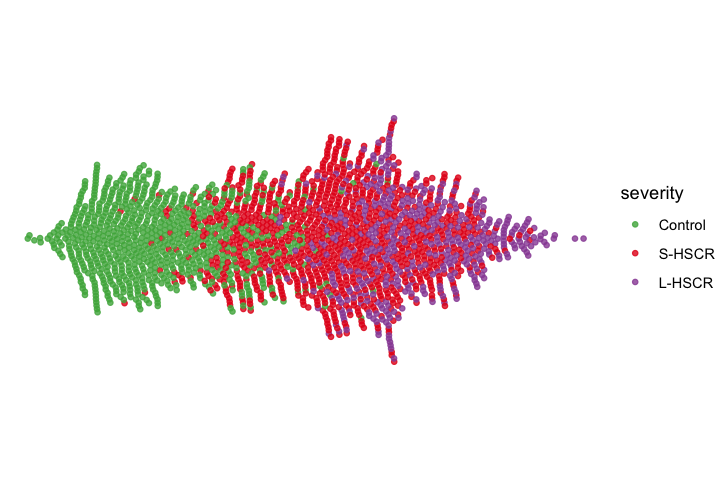

In [15]:
options(repr.plot.width=6, repr.plot.height=4)
p <- ggplot(pca_HSCR2, aes(x=z, y=pseudotime, fill=severity, color=severity)) + 
        geom_beeswarm(size=1.2,priority='ascending', cex=1.4, alpha=0.8) + 
        # ggtitle('ascending') + # Descending
        scale_x_continuous(expand=expansion(add=c(0.5, 0.5))) +
        coord_flip() +
        theme_void() +
        scale_color_manual(values=severity.colors)
p

In [109]:
ggsave(filename = "HSCR.PC2.beeswarm.pdf", width = 6, height = 4)

# pseudotime line plot
- see the expression of modules

In [5]:
head(pca_HSCR2)

x          y         colour_by X1        X2         X3        
UE.E1.P3      6.2859338 -36.66004 UE02302   -36.66004  6.2859338  -9.767583
X20c7.E6.C20 -0.6792527 -42.00144 HSCR#20   -42.00144 -0.6792527   1.943735
IMR90.E2.B14  1.6898474 -37.40706 IMR90     -37.40706  1.6898474  -3.894050
UE.E1.O17    18.4468633 -19.82741 UE02302   -19.82741 18.4468633 -10.518007
UE.E1.O13     6.2743164 -31.02882 UE02302   -31.02882  6.2743164 -14.324001
UE.E1.K20    15.4651673 -21.05034 UE02302   -21.05034 15.4651673  -8.146098
             X4        cellGroup severity diseaseScoreRaw diseaseScore group  
UE.E1.P3      6.604730 UE_ENCC   Control  -42.94597       0.0000000000 UE02302
X20c7.E6.C20 22.261787 HSCR_20c7 S-HSCR   -41.32219       0.0004683841 HSCR#20
IMR90.E2.B14 10.911051 IMR_ENCC  Control  -39.09691       0.0009367681 IMR90  
UE.E1.O17     3.859211 UE_ENCC   Control  -38.27428       0.0014051522 UE02302
UE.E1.O13     2.994452 UE_ENCC   Control  -37.30314       0.0018735363 UE02302
UE.E1.K20    18.269000 UE_ENCC   Control  -36.51550       0.0023419204 UE02302
             z pseudotime 
UE.E1.P3     1  -6.2859338
X20c7.E6.C20 1   0.6792527
IMR90.E2.B14 1  -1.6898474
UE.E1.O17    1 -18.4468633
UE.E1.O13    1  -6.2743164
UE.E1.K20    1 -15.4651673

In [6]:
pca_HSCR2$group <- pca_HSCR2$colour_by

In [7]:
# normalize to 0-1
pca_HSCR2$pseudotime <- (pca_HSCR2$pseudotime - min(pca_HSCR2$pseudotime)) / (max(pca_HSCR2$pseudotime) - min(pca_HSCR2$pseudotime))

In [8]:
min(pca_HSCR2$pseudotime)
max(pca_HSCR2$pseudotime)

[1] 0

[1] 1

In [10]:
# API
# sacle.data
exprM <- scale.data[,rownames(pca_HSCR2)]; annoDf <- pca_HSCR2
dim(exprM)

[1] 42853  2136

In [11]:
scale.data[1:5,1:5]

X20c7.E6.A10 X20c7.E6.A1 X20c7.E6.A12 X20c7.E6.A14 X20c7.E6.A18
TSPAN6    0.72189152  -0.24297770  0.54792987   0.24450974   0.58480341 
TNMD     -0.04562055  -0.04562055 -0.04562055  -0.04562055  -0.04562055 
DPM1      0.74567498   0.13808189 -2.00000000   0.41965024   0.25403779 
SCYL3    -0.48160085   1.42864844 -0.48160085   0.84052324  -0.48160085 
C1orf112 -0.73881054  -0.73881054 -0.73881054  -0.73881054   0.34802708

In [17]:
moduleList_df <- data.frame()
moduleList_df <- rbind(moduleList_df, data.frame(gene=HSCR_all_6.up, module="Module 1 (49 genes)"))
moduleList_df <- rbind(moduleList_df, data.frame(gene=HSCR_all_6.down, module="Module 2 (31 genes)"))
moduleList_df <- rbind(moduleList_df, data.frame(gene=HSCR_23_1_17.up, module="Module 3 (518 genes)"))
moduleList_df <- rbind(moduleList_df, data.frame(gene=HSCR_23_1_17.down, module="Module 4 (235 genes)"))
rownames(moduleList_df) <- moduleList_df$gene

In [18]:
table(moduleList_df$module)


 Module 1 (49 genes)  Module 2 (31 genes) Module 3 (518 genes) 
                  49                   31                  518 
Module 4 (235 genes) 
                 235 

In [19]:
genes_expr <- cbind(annoDf[,c("group","pseudotime")], t(exprM)[rownames(annoDf), moduleList_df$gene])
head(genes_expr)

group   pseudotime TMSB10     PDZD4      NOTCH3     NUAK1     
UE.E1.P3     UE02302 0.3537255  -1.9578186 -0.1762947  1.3176412 -0.5509169
X20c7.E6.C20 HSCR#20 0.4824593  -2.0000000 -0.1762947  1.1898839 -0.5509169
IMR90.E2.B14 IMR90   0.4386725   0.4339931 -0.1762947 -0.7327902 -0.5509169
UE.E1.O17    UE02302 0.1289617   0.2135757 -0.1762947 -0.7327902 -0.5509169
UE.E1.O13    UE02302 0.3539402  -1.0742201 -0.1762947  0.2240009 -0.5509169
UE.E1.K20    UE02302 0.1840707  -1.1063781 -0.1762947 -0.7327902 -0.5509169
             RUNX1T1    YPEL1     MAP1LC3A   ARMCX3     ⋯ DLEU1_1    RNA5-8SN5
UE.E1.P3      0.8460741 -0.582003 -0.4232021 -0.1917401 ⋯ -0.3664898  2.000000
X20c7.E6.C20  2.0000000  2.000000 -0.4232021 -1.1898029 ⋯ -0.3664898  2.000000
IMR90.E2.B14 -0.5691183 -0.582003 -0.4232021 -1.1898029 ⋯ -0.3664898  2.000000
UE.E1.O17    -0.5691183 -0.582003 -0.4232021  1.0271558 ⋯ -0.3664898  1.960814
UE.E1.O13    -0.5691183 -0.582003 -0.4232021 -1.1898029 ⋯ -0.3664898  2.000000
UE.E1.K20    -0.5691183 -0.582003 -0.4232021 -1.1898029 ⋯  2.0000000 -0.453699
             GOLGA6L22  RNA5-8S4  RNA5-8S4.1 AP000432.2 AC131649.2 AC040160.2
UE.E1.P3     -0.2361561  2.000000  2.000000   2.0000000  1.765497  -0.2791712
X20c7.E6.C20 -0.2361561  2.000000  2.000000  -0.3611887  2.000000   2.0000000
IMR90.E2.B14 -0.2361561  2.000000  2.000000   2.0000000 -1.101919  -0.2791712
UE.E1.O17    -0.2361561  1.960814  1.960814  -0.3611887 -1.101919  -0.2791712
UE.E1.O13    -0.2361561  2.000000  2.000000  -0.3611887 -1.101919  -0.2791712
UE.E1.K20    -0.2361561 -0.453699 -0.453699  -0.3611887 -1.101919  -0.2791712
             AC092184.1 LINC00891 
UE.E1.P3     -0.4923183  2.0000000
X20c7.E6.C20  2.0000000  2.0000000
IMR90.E2.B14  1.2787797 -0.2859234
UE.E1.O17    -0.4923183 -0.2859234
UE.E1.O13    -0.4923183 -0.2859234
UE.E1.K20    -0.4923183 -0.2859234

## Linear regresssion

In [20]:
moduleList_df$slope <- 0
moduleList_df$pvalue <- 0

In [21]:
head(moduleList_df)

gene    module              slope pvalue
TMSB10  TMSB10  Module 1 (49 genes) 0     0     
PDZD4   PDZD4   Module 1 (49 genes) 0     0     
NOTCH3  NOTCH3  Module 1 (49 genes) 0     0     
NUAK1   NUAK1   Module 1 (49 genes) 0     0     
RUNX1T1 RUNX1T1 Module 1 (49 genes) 0     0     
YPEL1   YPEL1   Module 1 (49 genes) 0     0

In [22]:
for ( gene in moduleList_df$gene) {
    tmp.x <- genes_expr$pseudotime
    tmp.y <- genes_expr[,gene]
    tmp.result <- lm(tmp.y ~ tmp.x)
    tmp.sum <- summary(tmp.result)
    tmp.slope <- tmp.sum$coefficients[2,1]
    tmp.pvalue <- tmp.sum$coefficients[2,4]
    # write
    moduleList_df[gene,]$slope <- tmp.slope
    moduleList_df[gene,]$pvalue <- tmp.pvalue
    # break
}

In [25]:
head(moduleList_df)

gene    module              slope      pvalue       
TMSB10  TMSB10  Module 1 (49 genes) 2.52861368 2.699360e-188
PDZD4   PDZD4   Module 1 (49 genes) 0.09187434  1.972764e-02
NOTCH3  NOTCH3  Module 1 (49 genes) 0.92037858  4.591690e-25
NUAK1   NUAK1   Module 1 (49 genes) 1.14968992  9.899837e-42
RUNX1T1 RUNX1T1 Module 1 (49 genes) 1.03403639  1.380071e-33
YPEL1   YPEL1   Module 1 (49 genes) 0.48835882  2.248671e-07

In [25]:
write.csv(moduleList_df, file="keyRdata/four_moduleList_df.csv")

In [76]:
moduleList_df <- read.csv("keyRdata/four_moduleList_df.csv")

In [26]:
moduleList_df[c("NOTCH3","GLI3","ORC3","GPC4","PTBP1","U2AF2","COX7B","MDH1"),]

gene   module               slope      pvalue      
NOTCH3 NOTCH3 Module 1 (49 genes)   0.9203786 4.591690e-25
GLI3   GLI3   Module 1 (49 genes)   1.1837145 8.734974e-44
ORC3   ORC3   Module 2 (31 genes)  -1.2074330 1.607270e-35
GPC4   GPC4   Module 2 (31 genes)  -1.2557047 1.909449e-43
PTBP1  PTBP1  Module 3 (518 genes)  1.0044625 1.361970e-28
U2AF2  U2AF2  Module 3 (518 genes)  1.0565483 6.658656e-28
COX7B  COX7B  Module 4 (235 genes) -0.9238681 1.008151e-25
MDH1   MDH1   Module 4 (235 genes) -0.7291091 2.561847e-26

In [30]:
# only for Fig2E
write.table(moduleList_df[c("NOTCH3","GLI3","ORC3","GPC4","PTBP1","U2AF2","COX7B","MDH1"),], file = "manuscript/Fig2E.csv", sep = ",", quote = F)

In [27]:
head(genes_expr)

group   pseudotime TMSB10     PDZD4      NOTCH3     NUAK1     
UE.E1.P3     UE02302 0.3537255  -1.9578186 -0.1762947  1.3176412 -0.5509169
X20c7.E6.C20 HSCR#20 0.4824593  -2.0000000 -0.1762947  1.1898839 -0.5509169
IMR90.E2.B14 IMR90   0.4386725   0.4339931 -0.1762947 -0.7327902 -0.5509169
UE.E1.O17    UE02302 0.1289617   0.2135757 -0.1762947 -0.7327902 -0.5509169
UE.E1.O13    UE02302 0.3539402  -1.0742201 -0.1762947  0.2240009 -0.5509169
UE.E1.K20    UE02302 0.1840707  -1.1063781 -0.1762947 -0.7327902 -0.5509169
             RUNX1T1    YPEL1     MAP1LC3A   ARMCX3     ⋯ DLEU1_1    RNA5-8SN5
UE.E1.P3      0.8460741 -0.582003 -0.4232021 -0.1917401 ⋯ -0.3664898  2.000000
X20c7.E6.C20  2.0000000  2.000000 -0.4232021 -1.1898029 ⋯ -0.3664898  2.000000
IMR90.E2.B14 -0.5691183 -0.582003 -0.4232021 -1.1898029 ⋯ -0.3664898  2.000000
UE.E1.O17    -0.5691183 -0.582003 -0.4232021  1.0271558 ⋯ -0.3664898  1.960814
UE.E1.O13    -0.5691183 -0.582003 -0.4232021 -1.1898029 ⋯ -0.3664898  2.000000
UE.E1.K20    -0.5691183 -0.582003 -0.4232021 -1.1898029 ⋯  2.0000000 -0.453699
             GOLGA6L22  RNA5-8S4  RNA5-8S4.1 AP000432.2 AC131649.2 AC040160.2
UE.E1.P3     -0.2361561  2.000000  2.000000   2.0000000  1.765497  -0.2791712
X20c7.E6.C20 -0.2361561  2.000000  2.000000  -0.3611887  2.000000   2.0000000
IMR90.E2.B14 -0.2361561  2.000000  2.000000   2.0000000 -1.101919  -0.2791712
UE.E1.O17    -0.2361561  1.960814  1.960814  -0.3611887 -1.101919  -0.2791712
UE.E1.O13    -0.2361561  2.000000  2.000000  -0.3611887 -1.101919  -0.2791712
UE.E1.K20    -0.2361561 -0.453699 -0.453699  -0.3611887 -1.101919  -0.2791712
             AC092184.1 LINC00891 
UE.E1.P3     -0.4923183  2.0000000
X20c7.E6.C20  2.0000000  2.0000000
IMR90.E2.B14  1.2787797 -0.2859234
UE.E1.O17    -0.4923183 -0.2859234
UE.E1.O13    -0.4923183 -0.2859234
UE.E1.K20    -0.4923183 -0.2859234

In [28]:
genes_expr <- melt(genes_expr, id.vars=c("pseudotime","group"))
head(genes_expr)

pseudotime group   variable value     
1 0.3537255  UE02302 TMSB10   -1.9578186
2 0.4824593  HSCR#20 TMSB10   -2.0000000
3 0.4386725  IMR90   TMSB10    0.4339931
4 0.1289617  UE02302 TMSB10    0.2135757
5 0.3539402  UE02302 TMSB10   -1.0742201
6 0.1840707  UE02302 TMSB10   -1.1063781

In [29]:
genes_expr$module <- moduleList_df[genes_expr$variable,]$module
head(genes_expr)

pseudotime group   variable value      module             
1 0.3537255  UE02302 TMSB10   -1.9578186 Module 1 (49 genes)
2 0.4824593  HSCR#20 TMSB10   -2.0000000 Module 1 (49 genes)
3 0.4386725  IMR90   TMSB10    0.4339931 Module 1 (49 genes)
4 0.1289617  UE02302 TMSB10    0.2135757 Module 1 (49 genes)
5 0.3539402  UE02302 TMSB10   -1.0742201 Module 1 (49 genes)
6 0.1840707  UE02302 TMSB10   -1.1063781 Module 1 (49 genes)

In [30]:
tmp_df <- data.frame()
for (i in names(table(moduleList_df$module))) {
    tmp_df <- rbind(tmp_df, apply(exprM[subset(moduleList_df, module==i)$gene, rownames(annoDf)], 2, mean))
    }
colnames(tmp_df) <- rownames(annoDf)
rownames(tmp_df) <- names(table(moduleList_df$module))

In [31]:
genes_expr_mean <- as.data.frame(cbind(pseudotime=annoDf$pseudotime, t(tmp_df)))
head(genes_expr_mean)

pseudotime Module 1 (49 genes) Module 2 (31 genes)
UE.E1.P3     0.3537255  -0.4283316          -0.008237507       
X20c7.E6.C20 0.4824593  -0.1102376          -0.474734900       
IMR90.E2.B14 0.4386725  -0.6228115          -0.003534257       
UE.E1.O17    0.1289617  -0.5660946           0.409697974       
UE.E1.O13    0.3539402  -0.7947946           0.011075287       
UE.E1.K20    0.1840707  -0.5767968           0.282095045       
             Module 3 (518 genes) Module 4 (235 genes)
UE.E1.P3     -0.3530308            0.06679679         
X20c7.E6.C20 -0.5612395           -0.24547711         
IMR90.E2.B14 -0.3003048           -0.28778160         
UE.E1.O17    -0.2806958            0.21389068         
UE.E1.O13    -0.2277840           -0.10405105         
UE.E1.K20    -0.3486682           -0.09086273

In [32]:
genes_expr_mean <- reshape::melt(genes_expr_mean, id.vars=c("pseudotime")) # ,"group"
genes_expr_mean$module <- genes_expr_mean$variable
#colnames(genes_expr_mean) <- c("pseudotime", "group", "module", "value")

In [33]:
tmp.order <- c("Module 1 (49 genes)", "Module 2 (31 genes)", "Module 3 (518 genes)", "Module 4 (235 genes)")

In [34]:
genes_expr_mean$variable <- factor(genes_expr_mean$variable, levels = tmp.order)
genes_expr_mean$module <- factor(genes_expr_mean$module, levels = tmp.order)
genes_expr$module <- factor(genes_expr$module, levels = tmp.order)

In [35]:
severity.colors

[1] "#4DAF4A" "#E41A1C" "#984EA3"

In [36]:
tmp.colors <- brewer.pal(12, "Set3")[c(7,3,6,4)]

In [37]:
head(genes_expr)

pseudotime group   variable value      module             
1 0.3537255  UE02302 TMSB10   -1.9578186 Module 1 (49 genes)
2 0.4824593  HSCR#20 TMSB10   -2.0000000 Module 1 (49 genes)
3 0.4386725  IMR90   TMSB10    0.4339931 Module 1 (49 genes)
4 0.1289617  UE02302 TMSB10    0.2135757 Module 1 (49 genes)
5 0.3539402  UE02302 TMSB10   -1.0742201 Module 1 (49 genes)
6 0.1840707  UE02302 TMSB10   -1.1063781 Module 1 (49 genes)

In [38]:
head(genes_expr_mean)

pseudotime variable            value      module             
1 0.3537255  Module 1 (49 genes) -0.4283316 Module 1 (49 genes)
2 0.4824593  Module 1 (49 genes) -0.1102376 Module 1 (49 genes)
3 0.4386725  Module 1 (49 genes) -0.6228115 Module 1 (49 genes)
4 0.1289617  Module 1 (49 genes) -0.5660946 Module 1 (49 genes)
5 0.3539402  Module 1 (49 genes) -0.7947946 Module 1 (49 genes)
6 0.1840707  Module 1 (49 genes) -0.5767968 Module 1 (49 genes)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



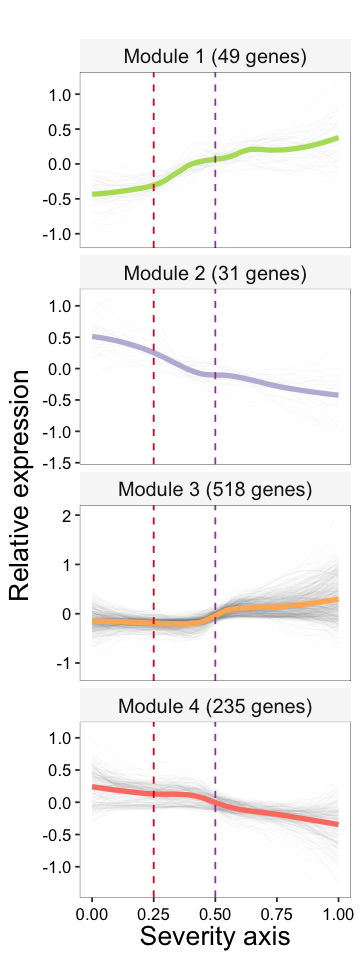

In [39]:
# options(repr.plot.width=4, repr.plot.height=6)
options(repr.plot.width=3, repr.plot.height=8)
g <- ggplot() +
    # geom_point(size=0.1, alpha=0.1) +
    labs(x = "Severity axis", y = "Relative expression", title = "") +
    # background lines
    geom_smooth(data=genes_expr, aes(x=pseudotime, y=value, fill=variable), 
                color=alpha("gray50",0.04), 
                method = 'loess',se=F,size=0.2,span = 0.5) + # ,alpha=0.05, weight=0.1,
    # mean lines
    geom_smooth(data=genes_expr_mean, aes(x=pseudotime, y=value, fill=variable, color=variable), 
                method = 'loess',se=F,size=1.5,span = 0.4) + # color=alpha("blue",1), 
    facet_wrap( ~ module, ncol=1, labeller = label_context, scales = "free_y") + # 
    # themes
    theme_bw() +
    # strip
    theme(strip.placement = "outside", strip.text.x = element_text(face="plain", size = 12), #italic
          strip.text.y = element_text(face="plain", size = 11),
          strip.background = element_rect(fill = "gray97", color = NA)) +
    #
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    #
    theme(panel.spacing=unit(.3, "lines"),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2,colour = "black")) +
    #
    theme(axis.text.x  = element_text(face="plain", angle=0, size = 10, color = "black", vjust=0.5),
        axis.text.y  = element_text(face="plain", size = 10, color = "black"),
        axis.title =element_text(size = 16)) +
    theme(legend.position = "none") +
    geom_vline(xintercept=0.25, colour="#E41A1C", linetype="dashed") +
    geom_vline(xintercept=0.50, colour="#984EA3", linetype="dashed") +
    scale_color_manual(values = tmp.colors)
g

In [40]:
ggsave(filename = "Figures/HSCR.module.line.plot.pdf", width = 3, height = 8)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



# global DEG num

In [70]:
names(DEG.1v1)

[1] "IMR_ENCC.vs.UE_ENCC"    "IMR_ENCC.vs.HSCR_5c3"   "IMR_ENCC.vs.HSCR_10c2" 
 [4] "IMR_ENCC.vs.HSCR_20c7"  "IMR_ENCC.vs.HSCR_23c9"  "IMR_ENCC.vs.HSCR_1c11" 
 [7] "IMR_ENCC.vs.HSCR_17c8"  "UE_ENCC.vs.HSCR_5c3"    "UE_ENCC.vs.HSCR_10c2"  
[10] "UE_ENCC.vs.HSCR_20c7"   "UE_ENCC.vs.HSCR_23c9"   "UE_ENCC.vs.HSCR_1c11"  
[13] "UE_ENCC.vs.HSCR_17c8"   "HSCR_5c3.vs.HSCR_10c2"  "HSCR_5c3.vs.HSCR_20c7" 
[16] "HSCR_5c3.vs.HSCR_23c9"  "HSCR_5c3.vs.HSCR_1c11"  "HSCR_5c3.vs.HSCR_17c8" 
[19] "HSCR_10c2.vs.HSCR_20c7" "HSCR_10c2.vs.HSCR_23c9" "HSCR_10c2.vs.HSCR_1c11"
[22] "HSCR_10c2.vs.HSCR_17c8" "HSCR_20c7.vs.HSCR_23c9" "HSCR_20c7.vs.HSCR_1c11"
[25] "HSCR_20c7.vs.HSCR_17c8" "HSCR_23c9.vs.HSCR_1c11" "HSCR_23c9.vs.HSCR_17c8"
[28] "HSCR_1c11.vs.HSCR_17c8"

In [71]:
# output a DEG set
HSCR.DEG.list <- list()
DEG.cor.num.df <- data.frame()
for (tmp.cor in seq(0,1,length.out = 101)) {
    #print(tmp.cor)
    # tmp.cor <- 0
    all.samples.df <- data.frame()
    for (i in c("HSCR_5c3","HSCR_10c2","HSCR_20c7","HSCR_1c11","HSCR_17c8","HSCR_23c9")) {
        #print(i)
        tmp.ctrl.1 <- paste("IMR_ENCC.vs.", i, sep = "")
        tmp.ctrl.2 <- paste("UE_ENCC.vs.", i, sep = "")
        tmp.DEG.comb <- cbind(DEG.1v1[[tmp.ctrl.1]], DEG.1v1[[tmp.ctrl.2]])
        colnames(tmp.DEG.comb) <- c('gene1','correlation1','log2FC1','gene2','correlation2','log2FC2')
        # tmp.DEGs <- subset(tmp.DEG.comb, correlation1*log2FC1>0 & correlation2*log2FC2>0 & correlation1*correlation2>0 & correlation1>tmp.cor & correlation2>tmp.cor)
        tmp.DEGs <- subset(tmp.DEG.comb, correlation1*log2FC1>0 & correlation2*log2FC2>0 & log2FC1*log2FC2>0 & abs(correlation1)>tmp.cor & abs(correlation2)>tmp.cor)
        tmp.DEG.num <- dim(tmp.DEGs)[1]
        tmp.df <- data.frame(cor=tmp.cor, num=tmp.DEG.num, type=i)
        all.samples.df <- rbind(all.samples.df, tmp.df)
        # output
        if (tmp.cor == 0.01) {
            HSCR.DEG.list[[i]] <- tmp.DEGs
        }
    }
    DEG.cor.num.df <- rbind(DEG.cor.num.df, all.samples.df)
}

In [73]:
head(DEG.cor.num.df)

cor num   type     
1 0   14727 HSCR_5c3 
2 0   14110 HSCR_10c2
3 0   16539 HSCR_20c7
4 0   14955 HSCR_1c11
5 0   17858 HSCR_17c8
6 0   15238 HSCR_23c9

In [74]:
table(DEG.cor.num.df$type)


 HSCR_5c3 HSCR_10c2 HSCR_20c7 HSCR_1c11 HSCR_17c8 HSCR_23c9 
      101       101       101       101       101       101 

In [75]:
DEG.cor.num.df$type <- plyr::mapvalues(DEG.cor.num.df$type, 
                                       from = c("HSCR_5c3","HSCR_10c2","HSCR_20c7","HSCR_1c11","HSCR_17c8","HSCR_23c9"),
                                       to = c("HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23"))
DEG.cor.num.df$type <- factor(DEG.cor.num.df$type, levels = c("HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23"))

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 294 rows containing non-finite values (stat_smooth).”


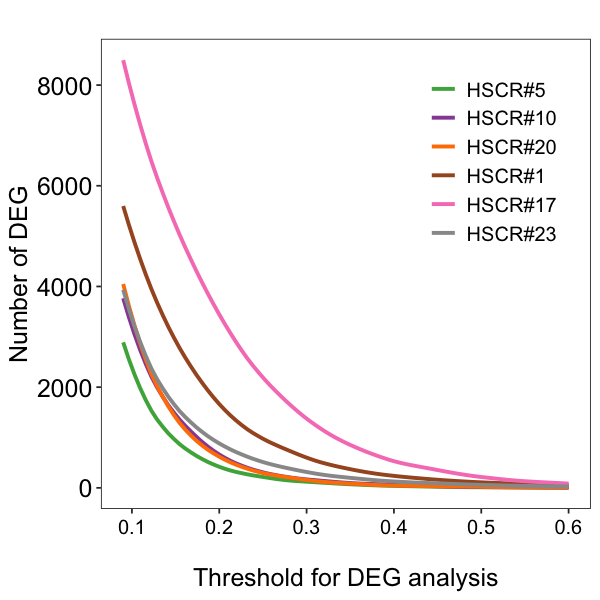

In [77]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data = DEG.cor.num.df, aes(x = cor, y = num, color = type)) +
    # geom_point() +
    # egg::theme_article() +
    # theme_minimal() +
    theme_bw() + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    stat_smooth(method = "loess", size = 1.1, se = F, span = 0.2) +
    theme(legend.title = element_blank(), legend.text = element_text(size = 12), legend.position = c(0.8, 0.75)) +
    labs(x = "\nThreshold for DEG analysis",y = "Number of DEG", title = " ") + 
    theme(axis.text.x  = element_text(face="plain", angle=0, size = 12, color = "black", vjust=0.5),
        axis.text.y  = element_text(face="plain", size = 15, color = "black"),
        axis.title =element_text(size = 15)) +
    scale_x_continuous(limits = c(0.09, 0.6), breaks = seq(0.1, 0.6, by = 0.1)) +
    scale_color_manual(values=sample.colors[3:8])

In [78]:
ggsave(filename = "Figures/DEG.threshold.pdf", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 294 rows containing non-finite values (stat_smooth).”


## DEG correlatin score

In [30]:
# table(DEG.cor.num.df$cor)

In [21]:
subset(DEG.cor.num.df, cor=="0.15")

cor  num  type   
91 0.15  942 HSCR#5 
92 0.15 1470 HSCR#10
93 0.15 1393 HSCR#20
94 0.15 2911 HSCR#1 
95 0.15 5210 HSCR#17
96 0.15 1624 HSCR#23

In [23]:
tmp.df <- data.frame(clinical_score=c(3,1,2,1,4,4), DEGnum=c(2911, 942, 1470, 1393, 5210, 1624))

In [24]:
tmp.df

clinical_score DEGnum
1 3              2911  
2 1               942  
3 2              1470  
4 1              1393  
5 4              5210  
6 4              1624

In [25]:
# GET EQUATION AND R-SQUARED AS STRING
# SOURCE: https://groups.google.com/forum/#!topic/ggplot2/1TgH-kG5XMA

lm_eqn <- function(df){
    m <- lm(y ~ x, df);
    eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(unname(coef(m)[1]), digits = 2),
              b = format(unname(coef(m)[2]), digits = 2),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));
}

In [26]:
tmp.df$sample <- c("HSCR#1","HSCR#5","HSCR#10","HSCR#20","HSCR#17","HSCR#23")

In [27]:
sample.order <- c("HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23") # ,"HSCR#6"
tmp.df$sample <- factor(tmp.df$sample, levels = sample.order)

In [28]:
sample.colors <- c(RColorBrewer::brewer.pal(9,"Set1")[c(1:5, 7:9)])[3:8] # , "green"

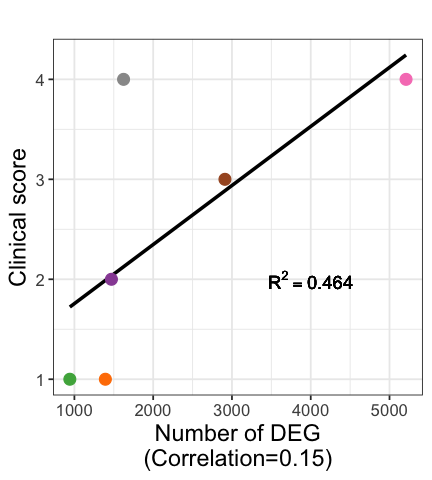

In [41]:
options(repr.plot.width=3.6, repr.plot.height=4)
p <- ggplot(data = tmp.df, aes(x = DEGnum, y = clinical_score)) +
            geom_smooth(method = "lm", se=FALSE, color="black", formula = y ~ x) +
            geom_point(aes(color=sample), size=3) +
            theme_bw() +
            labs(x = "Number of DEG\n(Correlation=0.15)", y = "Clinical score", title = "") +
            theme(legend.position = "none") + 
            theme(axis.text  = element_text(size = 10), axis.title = element_text(size = 14)) +
            scale_color_manual(values=sample.colors) +
            geom_text(x = 4000, y = 2, label = "R^2 == 0.464", parse = T)
p

In [43]:
ggsave(filename = "manuscript/FigS2.DEG.clinical.score.cor.pdf", width = 3.6, height = 4)

# QC

In [74]:
getwd()

[1] "/Users/zxli/Dropbox/Projects/EllyLab/human/singleCell/HSCR/manuscript"

## Detected gene number

In [4]:
options(stringsAsFactors = F)
print(load("../sce.smartseq.all.Rdata"))
# table(sce$cellGroup)
sce_HSCR <- sce[,sce$cellType %in% c("ctrl_ENCC", "HSCR_ENCC") & !sce$cellGroup %in% c("HSCR_3c15")] # "HSCR_6c5"
# table(sce_HSCR$cellGroup)
# counts(sce_HSCR)[1:5,1:5]

all_gene_num <- data.frame(group=as.character(sce_HSCR$cellGroup), gene_num=colSums(counts(sce_HSCR)>0))
median(all_gene_num$gene_num)

# head(all_gene_num)
# all_gene_num$group <- factor(all_gene_num$group, levels = rev(c("IMR_ENCC","UE_ENCC","HSCR_5c3","HSCR_20c7","HSCR_10c2",
#                                                            "HSCR_1c11","HSCR_17c8","HSCR_23c9","HSCR_6c5")))
# table(all_gene_num$group)

[1] "sce"


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, pa

In [2]:
all_gene_num$group <- plyr::mapvalues(all_gene_num$group, 
                        from = c("IMR_ENCC","UE_ENCC","HSCR_5c3","HSCR_20c7","HSCR_10c2","HSCR_1c11","HSCR_17c8","HSCR_23c9","HSCR_6c5"),
                        to = c("IMR90","UE02302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23","HSCR#6"))

all_gene_num$group <- factor(all_gene_num$group, levels = rev(c("IMR90","UE02302",
                                                "HSCR#5","HSCR#10","HSCR#20","HSCR#1","HSCR#17","HSCR#23","HSCR#6")))

In [5]:
library(dplyr)

In [6]:
all_gene_num %>%
    group_by(group) %>%
    summarize(Mean = mean(gene_num))

group   Mean    
1 HSCR#6  5621.646
2 HSCR#23 6397.804
3 HSCR#17 8512.122
4 HSCR#1  7542.464
5 HSCR#20 6236.997
6 HSCR#10 5084.448
7 HSCR#5  5646.719
8 UE02302 5946.010
9 IMR90   6116.299

In [3]:
head(all_gene_num)

group   gene_num
X20c7.E6.A10 HSCR#20 5321    
X20c7.E6.A11 HSCR#20 6563    
X20c7.E6.A1  HSCR#20 7581    
X20c7.E6.A12 HSCR#20 4709    
X20c7.E6.A13 HSCR#20 7690    
X20c7.E6.A14 HSCR#20 6781

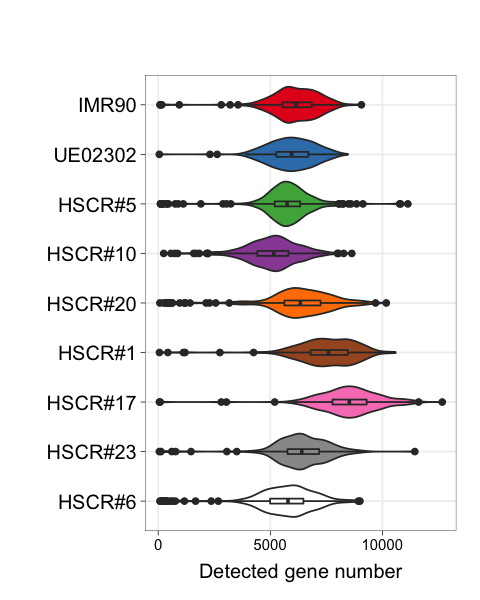

In [63]:
options(repr.plot.width=4, repr.plot.height=5)
g1 <- ggplot(data=all_gene_num, aes(x=group, y=gene_num, fill=group)) +
    geom_violin(trim=T) +
    geom_boxplot(width=0.1) +
    coord_flip() +
    labs(x = "", y = "Detected gene number", title="") + 
    theme_bw() +
    theme(axis.text.y = element_text(size = 12, color = "black", face = "plain"), 
          axis.text.x = element_text(size = 9, color = "black", face = "plain")) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),  
          panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
    # theme(axis.line = element_line(color = 'black')) +
    #theme_Publication() +
    theme(plot.title = element_text(face = "plain", size = 12, hjust = 0.5),
               axis.title.y = element_text(size = 12, angle=90,vjust =2),
               axis.title.x = element_text(size = 12, vjust = -0.2),
               #axis.text.x = element_text(size = 9), 
               # axis.line = element_line(colour="black"),
               axis.ticks = element_line(color = "black", size = 0.2)) +
    # scale_fill_Publication() +
    scale_fill_manual(values = rev(c(brewer.pal(9,"Set1")[c(1:5,7:9)],"white"))) +
    theme(legend.position = "none", plot.margin=unit(c(10,5,5,5),"mm"),
         panel.grid.major = element_line(colour="#f0f0f0")) 
g1

## Uniquely.mapped.reads.number

In [34]:
STAR.stat <- read.csv("/Users/zxli/Dropbox/Projects/EllyLab/human/singleCell/STAR.stat.csv", stringsAsFactors = F)

In [35]:
mean(STAR.stat$Uniquely.mapped.reads.number)

[1] 791542

In [36]:
head(STAR.stat)

X sample       Uniquely.mapped.reads.number Uniquely.mapped.reads.Pct
1 1 10c2-E11-A10  530519                      88.18                    
2 2 10c2-E11-A11 1129398                      92.55                    
3 3 10c2-E11-A12  424788                      86.55                    
4 4 10c2-E11-A13  418153                      85.81                    
5 5 10c2-E11-A14  942995                      90.42                    
6 6 10c2-E11-A15 1044715                      91.42                    
  Number.of.splices cellName     cellGroup
1 412284            10c2-E11-A10 HSCR_10c2
2 949087            10c2-E11-A11 HSCR_10c2
3 284732            10c2-E11-A12 HSCR_10c2
4 263182            10c2-E11-A13 HSCR_10c2
5 832195            10c2-E11-A14 HSCR_10c2
6 891364            10c2-E11-A15 HSCR_10c2

In [37]:
STAR.stat %>%
    group_by(cellGroup) %>%
    summarise(un=mean(Uniquely.mapped.reads.number), up=mean(Uniquely.mapped.reads.Pct), ns=mean(Number.of.splices)) -> tmp
# tmp

In [38]:
tmp$ratio <- tmp$ns / tmp$un

In [39]:
tmp

cellGroup          un        up       ns        ratio    
1  HSCR_10c2           496522.6 84.19263  377100.6 0.7594833
2  HSCR_17c8          1067904.5 81.04909 1181273.6 1.1061604
3  HSCR_1c11          1117358.6 83.79161 1417697.5 1.2687937
4  HSCR_20c7           595668.9 89.24932  405418.9 0.6806112
5  HSCR_23c9          1511435.8 84.61221 1816844.8 1.2020655
6  HSCR_3c15          1063432.3 79.80891 1251760.3 1.1770946
7  HSCR_5c3            529365.0 87.76299  391458.7 0.7394872
8  HSCR_6c5            539360.7 88.84525  416408.8 0.7720415
9  IMR_ENCC            528627.6 91.05042  390676.2 0.7390386
10 IMR_N_Diff_D20     1209116.1 84.82823 1230417.5 1.0176173
11 IMR_N_Diff_D40      887761.7 46.23982  334936.6 0.3772821
12 IMR_SAG_ENCC_0_10   513991.7 89.56089  418974.2 0.8151380
13 IMR_SAG_ENCC_0_4    534856.8 89.98646  405873.9 0.7588460
14 IMR_SAG_N_Diff_D20 1429896.7 74.39620 1303474.1 0.9115862
15 IMR_iPSC            476569.1 92.86167  414902.5 0.8706029
16 UE_ENCC             551599.1 91.36269  437384.5 0.7929391
17 UE_N_Diff_D20       542897.8 90.74845  328548.2 0.6051751
18 UE_N_Diff_D40       811554.8 72.63750  610971.0 0.7528400
19 UE_iPSC             545508.8 92.65130  477763.6 0.8758128

In [22]:
old.groups <- c("IMR_ENCC","UE_ENCC","HSCR_5c3","HSCR_20c7","HSCR_10c2","HSCR_1c11","HSCR_17c8","HSCR_23c9","HSCR_6c5")
new.groups <- c("IMR90","UE02302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23","HSCR#6")

In [40]:
old.groups <- c("IMR_ENCC","UE_ENCC","HSCR_5c3","HSCR_20c7","HSCR_10c2","HSCR_1c11","HSCR_17c8","HSCR_23c9","HSCR_6c5","IMR_SAG_ENCC_0_4","IMR_SAG_ENCC_0_10")
new.groups <- c("IMR90","UE02302","HSCR#5","HSCR#20","HSCR#10","HSCR#1","HSCR#17","HSCR#23","HSCR#6","SAG_0_4","SAG_0_10")

In [41]:
STAR.stat <- subset(STAR.stat, cellGroup %in% old.groups)

In [42]:
STAR.stat$group <- plyr::mapvalues(STAR.stat$cellGroup, 
                        from = old.groups, to = new.groups)
STAR.stat$group <- factor(STAR.stat$group, levels = rev(new.groups))

In [43]:
table(STAR.stat$group)


SAG_0_10  SAG_0_4   HSCR#6  HSCR#23  HSCR#17   HSCR#1  HSCR#10  HSCR#20 
     384      384      362      280      384      384      384      384 
  HSCR#5  UE02302    IMR90 
     384      390      384 

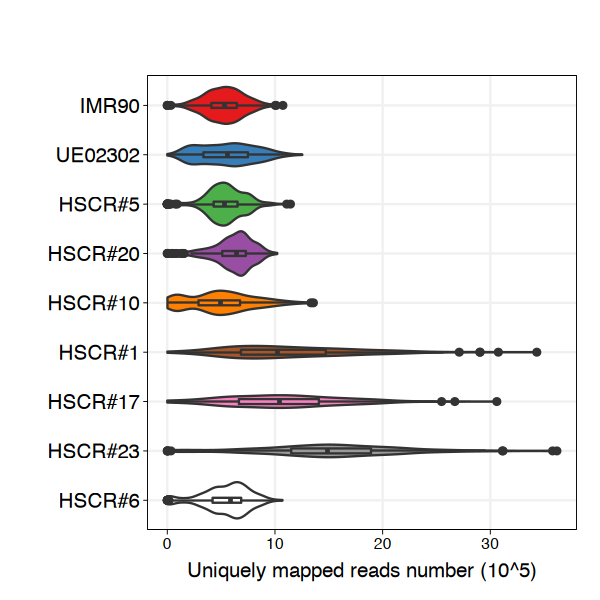

In [26]:
options(repr.plot.width=5, repr.plot.height=5)
g2 <- ggplot(data=STAR.stat, aes(x=group, y=`Uniquely.mapped.reads.number`/100000, fill=group)) +
    geom_violin(trim=T) +
    geom_boxplot(width=0.1) +
    coord_flip() +
    labs(x = "", y = "Uniquely mapped reads number (10^5)", title="") + 
    theme_bw() +
    theme(axis.text.y = element_text(size = 12, color = "black", face = "plain"), 
          axis.text.x = element_text(size = 9, color = "black", face = "plain")) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),  
          panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
    # theme(axis.line = element_line(color = 'black')) +
    #theme_Publication() +
    theme(plot.title = element_text(face = "plain", size = 12, hjust = 0.5),
               axis.title.y = element_text(size = 12, angle=90,vjust =2),
               axis.title.x = element_text(size = 12, vjust = -0.2),
               #axis.text.x = element_text(size = 9), 
               # axis.line = element_line(colour="black"),
               axis.ticks = element_line(color = "black", size = 0.2)) +
    # scale_fill_Publication() +
    scale_fill_manual(values = rev(c(brewer.pal(9,"Set1")[c(1:5,7:9)],"white"))) +
    theme(legend.position = "none", plot.margin=unit(c(10,5,5,5),"mm"),
         panel.grid.major = element_line(colour="#f0f0f0")) 
g2

## Uniquely.mapped.reads.Pct

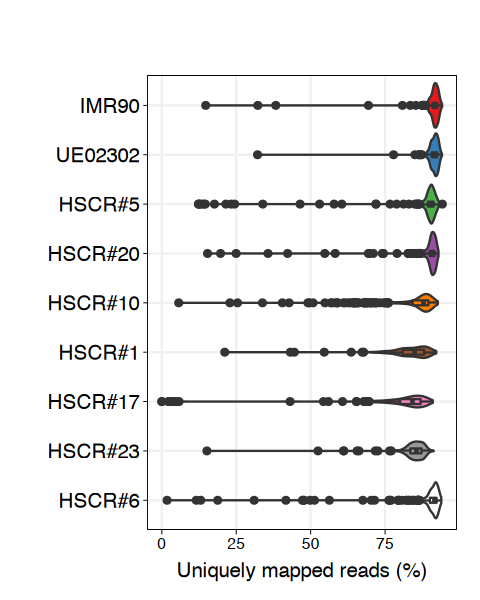

In [27]:
options(repr.plot.width=4, repr.plot.height=5)
g3 <- ggplot(data=STAR.stat, aes(x=group, y=`Uniquely.mapped.reads.Pct`, fill=group)) +
    geom_violin(trim=T) +
    geom_boxplot(width=0.1) +
    coord_flip() +
    labs(x = "", y = "Uniquely mapped reads (%)", title="") + 
    theme_bw() +
    theme(axis.text.y = element_text(size = 12, color = "black", face = "plain"), 
          axis.text.x = element_text(size = 9, color = "black", face = "plain")) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),  
          panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
    # theme(axis.line = element_line(color = 'black')) +
    #theme_Publication() +
    theme(plot.title = element_text(face = "plain", size = 12, hjust = 0.5),
               axis.title.y = element_text(size = 12, angle=90,vjust =2),
               axis.title.x = element_text(size = 12, vjust = -0.2),
               #axis.text.x = element_text(size = 9), 
               # axis.line = element_line(colour="black"),
               axis.ticks = element_line(color = "black", size = 0.2)) +
    # scale_fill_Publication() +
    scale_fill_manual(values = rev(c(brewer.pal(9,"Set1")[c(1:5,7:9)],"white"))) +
    theme(legend.position = "none", plot.margin=unit(c(10,5,5,5),"mm"),
         panel.grid.major = element_line(colour="#f0f0f0")) 
g3

In [65]:
ggsave(filename = "manuscript/HSCR.QC.pdf", width = 12, height = 5)

## Number.of.splices

In [29]:
# add significace testing
seg_1 <- data.frame(x=8-0.25,xend=9+0.25, y=1.1,yend=1.1,group="HSCR#10")
seg_2 <- data.frame(x=5-0.25,xend=7+0.25, y=1.1,yend=1.1,group="HSCR#10")
seg_3 <- data.frame(x=2-0.25,xend=3+0.25, y=1.6,yend=1.6,group="HSCR#10")

In [30]:
severity.colors <- c("#4DAF4A", "#E41A1C", "#984EA3")

In [31]:
# install.packages("ggprism")
library(ggprism)

In [32]:
df_p_val <- data.frame(xmin = 6, xmax = 8.5, label = "", y.position = 1.22, group="HSCR#10")
df_p_val2 <- data.frame(xmin = 2.5, xmax = 8.5, label = "", y.position = 1.8, group="HSCR#10")
df_p_val3 <- data.frame(xmin = 2.5, xmax = 6, label = "", y.position = 1.7, group="HSCR#10")

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


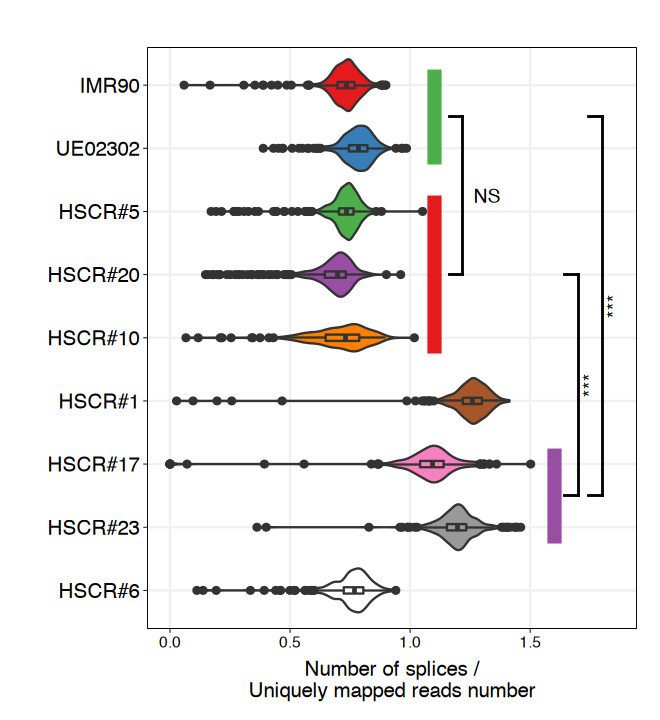

In [33]:
options(repr.plot.width=5.5, repr.plot.height=6)
g4 <- ggplot(data=STAR.stat, aes(x=group, y=`Number.of.splices`/`Uniquely.mapped.reads.number`, fill=group)) +
    # add line
    #geom_hline(yintercept=0.75, linetype="dashed", color = "#4DAF4A", size=1) +
    #geom_hline(yintercept=1.15, linetype="dashed", color = "#984EA3", size=1) +
    # add P text (P = 3.7e-12)
    # annotate("text", label = "P = 3.7e-12", x = 1.2, y = 2, size = 6, colour = "black") +
    #
    geom_violin(trim=T) +
    geom_boxplot(width=0.1) +
    
    coord_flip() +
    # title="Two-sided Mann-Whitney U test\nP-value = 3.7e-12"
    labs(x = "", y = "Number of splices /\nUniquely mapped reads number") + 
    theme_bw() +
    theme(axis.text.y = element_text(size = 12, color = "black", face = "plain"), 
          axis.text.x = element_text(size = 9, color = "black", face = "plain")) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),  
          panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
    # theme(axis.line = element_line(color = 'black')) +
    #theme_Publication() +
    theme(plot.title = element_text(face = "plain", size = 12, hjust = 0.5),
               axis.title.y = element_text(size = 12, angle=90,vjust =2),
               axis.title.x = element_text(size = 12, vjust = -0.2),
               #axis.text.x = element_text(size = 9), 
               # axis.line = element_line(colour="black"),
               axis.ticks = element_line(color = "black", size = 0.2)) +
    # scale_fill_Publication() +
    scale_fill_manual(values = rev(c(brewer.pal(9,"Set1")[c(1:5,7:9)],"white"))) +
    theme(legend.position = "none", plot.margin=unit(c(10,5,5,5),"mm"),
         panel.grid.major = element_line(colour="#f0f0f0")) +
    ylim(c(0,1.85)) +
    # add p-value segment
    geom_segment(data=seg_1, aes(x=x,y=y,xend=xend,yend=yend), size=3, color="#4DAF4A") +
    geom_segment(data=seg_2, aes(x=x,y=y,xend=xend,yend=yend), size=3, color="#E41A1C") +
    geom_segment(data=seg_3, aes(x=x,y=y,xend=xend,yend=yend), size=3, color="#984EA3") +
    # add pvalue *
    annotate("text", label = "NS", x = 7.25, y =1.32, size = 4, colour = "black") +
    annotate("text", label = "***", x = 5.5, y =1.85, size = 4, colour = "black", angle = 90) +
    annotate("text", label = "***", x = 4.25, y =1.75, size = 4, colour = "black", angle = 90) +
    # add Bracket
    add_pvalue(df_p_val, xmin = "xmin", xmax = "xmax", y.position = "y.position", label = "label") +
    add_pvalue(df_p_val2, xmin = "xmin", xmax = "xmax", y.position = "y.position", label = "label") +
    add_pvalue(df_p_val3, xmin = "xmin", xmax = "xmax", y.position = "y.position", label = "label")
g4

In [131]:
ggsave(filename = "Figures/HSCR.AS.QC.pdf", width = 5.5, height = 7)

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
